# Importing necessary library

In [1]:
# Import necessary library
import pandas as pd
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter, MaxNLocator
from IPython.display import Markdown, display
import missingno as msno
from matplotlib.lines import Line2D

# !pip install scikit-learn # Install scikit-learn if needed
# !pip install missingno
# !pip install xgboost

# Importing and Inspecting the data

In [2]:
# Load CSV file from your local path
file_path = r"C:\Users\danie\Downloads\Git\credit_loan_generation.csv"  # Use raw string (r"") to avoid path errors
credit_loan = pd.read_csv(file_path)

In [3]:
# Check the structure of the data
print(credit_loan.dtypes)
print(f'Dataset Dimensions: Rows and Columns {credit_loan.shape}')

person_age                    float64
person_income                 float64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                     float64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length    float64
country                        object
region                         object
city                           object
gender                         object
marriage_status                 int64
interest_rate_band             object
dtype: object
Dataset Dimensions: Rows and Columns (500000, 18)


In [4]:
# Print summary statistics
display(credit_loan.describe(include='all'))

person_age  person_income person_home_ownership  person_emp_length  \
count   500000.000000   5.000000e+05                500000      465133.000000   
unique            NaN            NaN                     4                NaN   
top               NaN            NaN                  RENT                NaN   
freq              NaN            NaN                252283                NaN   
mean        27.731836   6.594349e+04                   NaN           7.612071   
std          6.226817   5.980756e+04                   NaN           5.009417   
min         20.000000   2.498005e+03                   NaN           0.000000   
25%         23.000000   3.863399e+04                   NaN           4.000000   
50%         26.000000   5.526477e+04                   NaN           6.000000   
75%         30.000000   7.920828e+04                   NaN          10.000000   
max         85.000000   6.000939e+06                   NaN          57.000000   

       loan_intent loan_grade      loan_amnt  loan_int_rate    loan_status  \
count       500000     500000  500000.000000  452026.000000  500000.000000   
unique           6          7            NaN            NaN            NaN   
top      EDUCATION          A            NaN            NaN            NaN   
freq         99391     165443            NaN            NaN            NaN   
mean           NaN        NaN    9581.802347      10.650164       0.218662   
std            NaN        NaN    6310.701267       2.456047       0.413339   
min            NaN        NaN     383.049251       6.400000       0.000000   
25%            NaN        NaN    4974.868015       8.526000       0.000000   
50%            NaN        NaN    8022.865817      10.649000       0.000000   
75%            NaN        NaN   12170.895940      12.775000       0.000000   
max            NaN        NaN   35219.119101      14.900000       1.000000   

        loan_percent_income cb_person_default_on_file  \
count         500000.000000                    500000   
unique                  NaN                         2   
top                     NaN                         N   
freq                    NaN                    411799   
mean               0.170292                       NaN   
std                0.107024                       NaN   
min               -0.002324                       NaN   
25%                0.089746                       NaN   
50%                0.149364                       NaN   
75%                0.229728                       NaN   
max                0.832471                       NaN   

        cb_person_cred_hist_length         country   region         city  \
count                500000.000000          500000   500000       500000   
unique                         NaN               1        4           23   
top                            NaN  United Kingdom  England  Southampton   
freq                           NaN          500000   420528        42230   
mean                      5.808096             NaN      NaN          NaN   
std                       4.051326             NaN      NaN          NaN   
min                       1.838542             NaN      NaN          NaN   
25%                       2.986869             NaN      NaN          NaN   
50%                       4.026895             NaN      NaN          NaN   
75%                       8.002462             NaN      NaN          NaN   
max                      30.156859             NaN      NaN          NaN   

        gender  marriage_status interest_rate_band  
count   500000    500000.000000             452026  
unique       2              NaN                  4  
top     Female              NaN          11.5-14.9  
freq    254751              NaN             180805  
mean       NaN         0.549594                NaN  
std        NaN         0.497535                NaN  
min        NaN         0.000000                NaN  
25%        NaN         0.000000                NaN  
50%        NaN         1.0

In [5]:
# Count the number of missing values in each column
print(credit_loan.isna().sum())

person_age                        0
person_income                     0
person_home_ownership             0
person_emp_length             34867
loan_intent                       0
loan_grade                        0
loan_amnt                         0
loan_int_rate                 47974
loan_status                       0
loan_percent_income               0
cb_person_default_on_file         0
cb_person_cred_hist_length        0
country                           0
region                            0
city                              0
gender                            0
marriage_status                   0
interest_rate_band            47974
dtype: int64


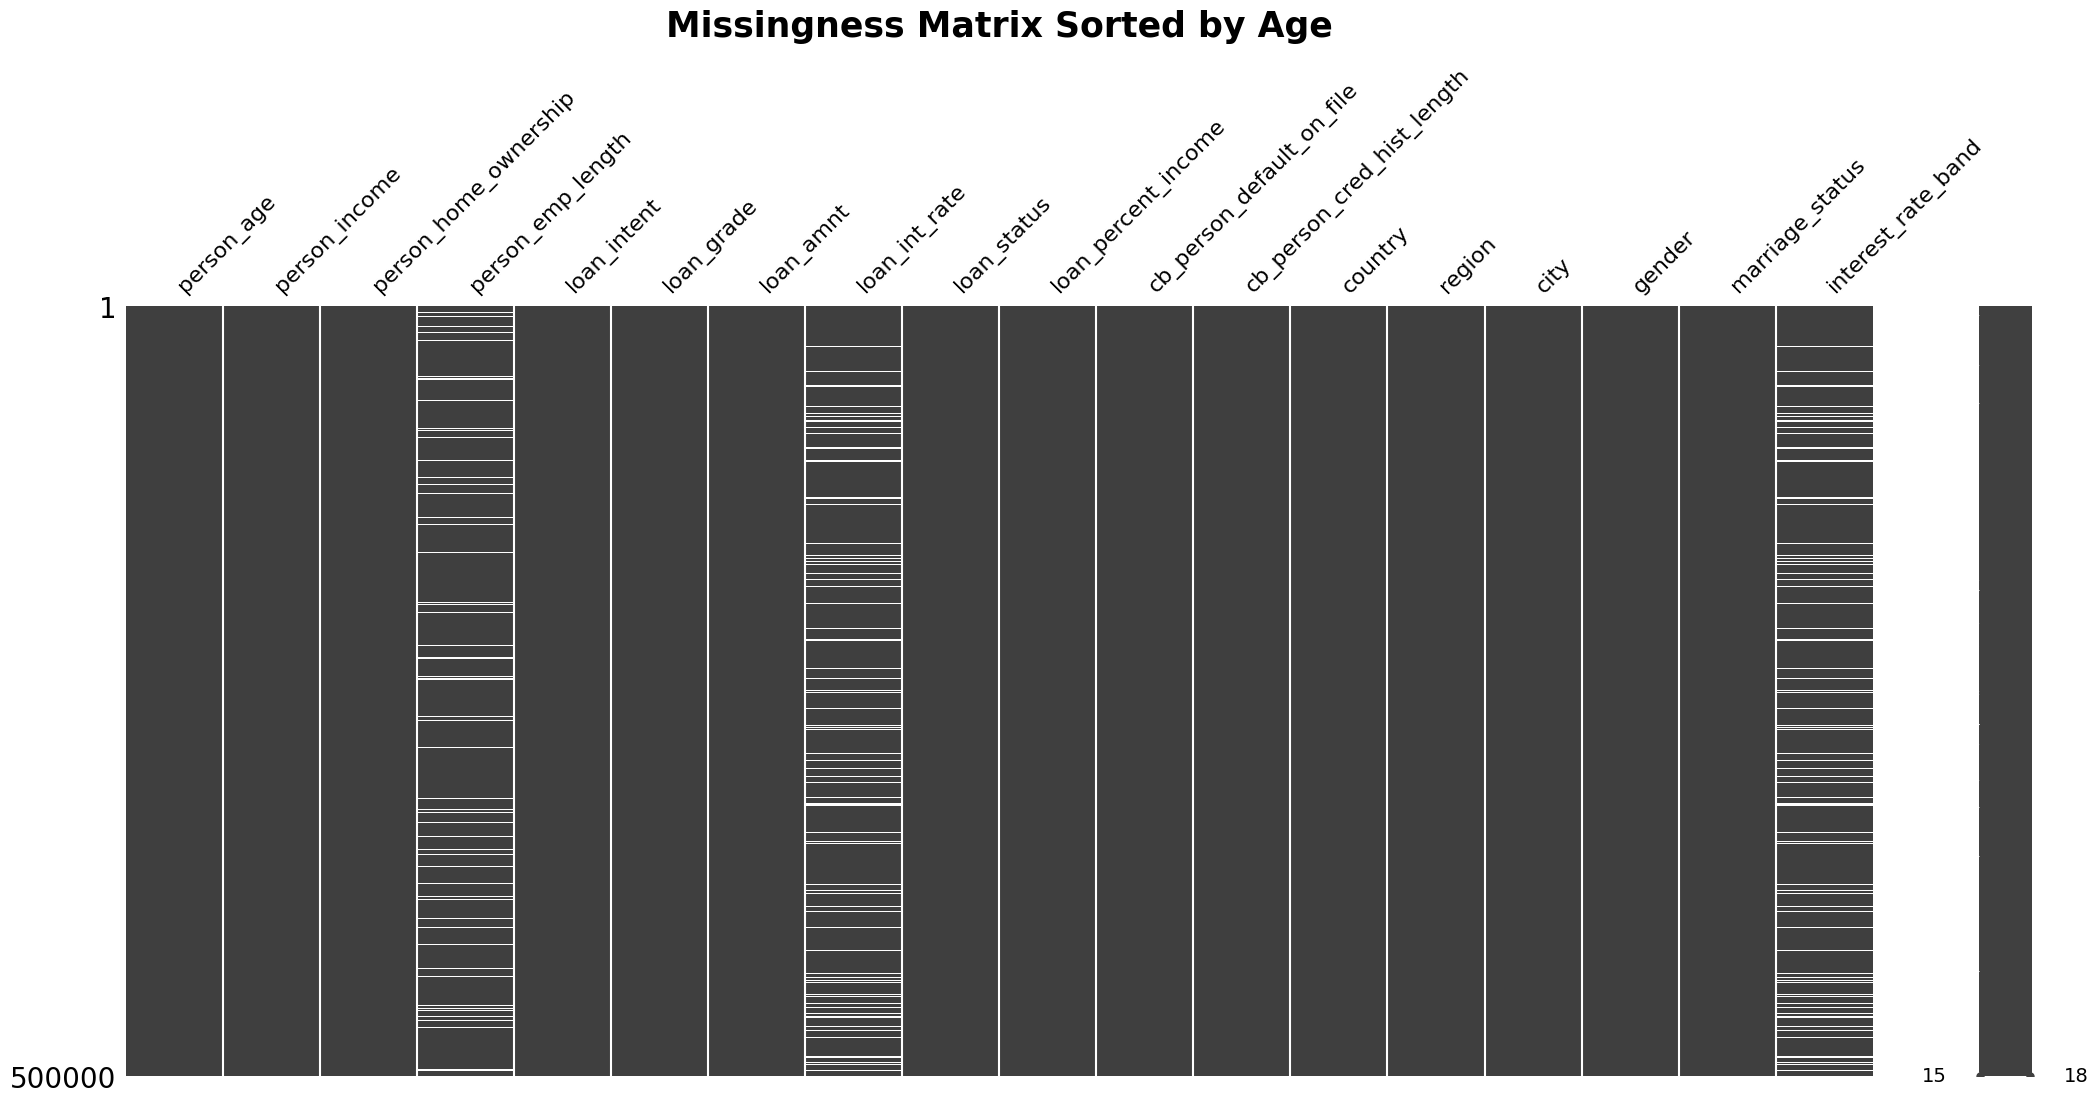

In [6]:
# Sort cr_loan by age and visualize missingness matrix
credit_loan_sorted = credit_loan.sort_values(by='person_age')
msno.matrix(credit_loan_sorted)
plt.title("Missingness Matrix Sorted by Age", fontsize=25, fontweight='bold', pad=20)
plt.show()

In [7]:
# Summary of missing (NaN/Null) and zero values per column then sort by highest combined NaN/Null + Zeros
missing_summary = (
    # Get the data type (e.g., float, object) for every column in the DataFrame
    credit_loan_sorted.dtypes.to_frame(name="Type")
    # Join the 'Type' column with a new DataFrame containing calculated statistics
    .join(pd.DataFrame({
        "Missed values": credit_loan_sorted.isna().sum(), # Calculate the count of missing (NaN or Null) values for each column
        "Percentage Missed": round(credit_loan_sorted.isna().mean() * 100, 2), # Calculate the percentage of missing values, round to 2 decimal places
        "Zeros": (credit_loan_sorted == 0).sum(),         # Calculate the count of explicit zero (0) values for each column
        "Percentage Zeros": round((credit_loan_sorted == 0).mean() * 100, 2)})) # Calculate the percentage of explicit zero values, round to 2 decimal places
    # Use .assign() to create a new calculated column
    .assign(**{"NaN/Null + Zeros": lambda df: df["Missed values"] + df["Zeros"]})
    # Sort the resulting DataFrame in descending order based on the combined count
    .sort_values(by="NaN/Null + Zeros", ascending=False))

# Display the final summary table
display(missing_summary)

Type  Missed values  Percentage Missed   Zeros  \
loan_status                   int64              0               0.00  390669   
marriage_status               int64              0               0.00  225203   
interest_rate_band           object          47974               9.59       0   
loan_int_rate               float64          47974               9.59       0   
person_emp_length           float64          34867               6.97     763   
person_age                  float64              0               0.00       0   
person_income               float64              0               0.00       0   
loan_intent                  object              0               0.00       0   
loan_grade                   object              0               0.00       0   
person_home_ownership        object              0               0.00       0   
loan_percent_income         float64              0               0.00       0   
loan_amnt                   float64              0               0.00       0   
cb_person_default_on_file    object              0               0.00       0   
cb_person_cred_hist_length  float64              0               0.00       0   
region                       object              0               0.00       0   
country                      object              0               0.00       0   
gender                       object              0               0.00       0   
city                         object              0               0.00       0   

                            Percentage Zeros  NaN/Null + Zeros  
loan_status                            78.13            390669  
marriage_status                        45.04            225203  
interest_rate_band                      0.00             47974  
loan_int_rate                           0.00             47974  
person_emp_length                       0.15             35630  
person_age                              0.00                 0  
person_income                           0.00                 0  
loan_intent                             0.00                 0  
loan_grade                              0.00                 0  
person_home_ownership                   0.00                 0  
loan_percent_income                     0.00                 0  
loan_amnt                               0.00                 0  
cb_person_default_on_file               0.00                 0  
cb_person_cred_hist_length              0.00                 0  
region                                  0.00                 0  
country                                 0.00                 0  
gender                                  0.00                 0  
city                                    0.00                 0

In [8]:
## Preview the dataset
display(credit_loan_sorted.head())

person_age  person_income person_home_ownership  person_emp_length  \
306184        20.0   86268.145672              MORTGAGE                2.0   
487754        20.0   64422.896832                  RENT                2.0   
345168        20.0  188432.668519              MORTGAGE                2.0   
20452         20.0  187737.640660              MORTGAGE                2.0   
242629        20.0   42805.399189                  RENT                2.0   

              loan_intent loan_grade     loan_amnt  loan_int_rate  \
306184  DEBTCONSOLIDATION          A  12048.954145          8.963   
487754            VENTURE          D  16063.946007         14.130   
345168           PERSONAL          A   1988.889730          8.741   
20452            PERSONAL          A   1990.946348          8.793   
242629            VENTURE          B   6498.178954         11.512   

        loan_status  loan_percent_income cb_person_default_on_file  \
306184            0             0.138550                         N   
487754            1             0.251332                         Y   
345168            0             0.009828                         N   
20452             0             0.010492                         N   
242629            0             0.149805                         N   

        cb_person_cred_hist_length         country            region  \
306184                    1.998943  United Kingdom           England   
487754                    4.000441  United Kingdom  Northern Ireland   
345168                    1.995921  United Kingdom           England   
20452                     2.011018  United Kingdom           England   
242629                    2.023482  United Kingdom           England   

               city  gender  marriage_status interest_rate_band  
306184       London  Female                0            7.5-9.5  
487754      Belfast    Male                1          11.5-14.9  
345168   Nottingham  Female                0            7.5-9.5  
20452   Southampton    Male                1            7.5-9.5  
242629    Sheffield  Female                1          11.5-14.9

# Data Cleaning

In [9]:
# Drop duplicates if any
credit_loan_sorted = credit_loan_sorted.drop_duplicates()

# Re-check for duplicates
duplicates = credit_loan_sorted.duplicated(keep=False)
print(f'Number of duplicate rows: {duplicates.sum()}')

Number of duplicate rows: 0


In [10]:
# Remove the '-' character from the string representation of numbers in 'person_emp_length'
credit_loan_sorted['person_emp_length'] = (credit_loan_sorted['person_emp_length'].astype(str) # Convert to string
    .str.strip('-') # Use the str.strip() method to remove '-' from both ends
    .astype(float)) # Convert back to float

In [11]:
# Drop records where 'person_emp_length' is missing (NaN). Employment length is a critical predictor for 
# credit risk models and incomplete records would skew model accuracy and reliability.
credit_loan_clean = credit_loan_sorted.dropna(subset=['person_emp_length'])
print(f'Dataset Dimensions after cleaning: Rows and Columns {credit_loan_clean.shape}')

Dataset Dimensions after cleaning: Rows and Columns (465133, 18)


<Figure size 1000x600 with 0 Axes>

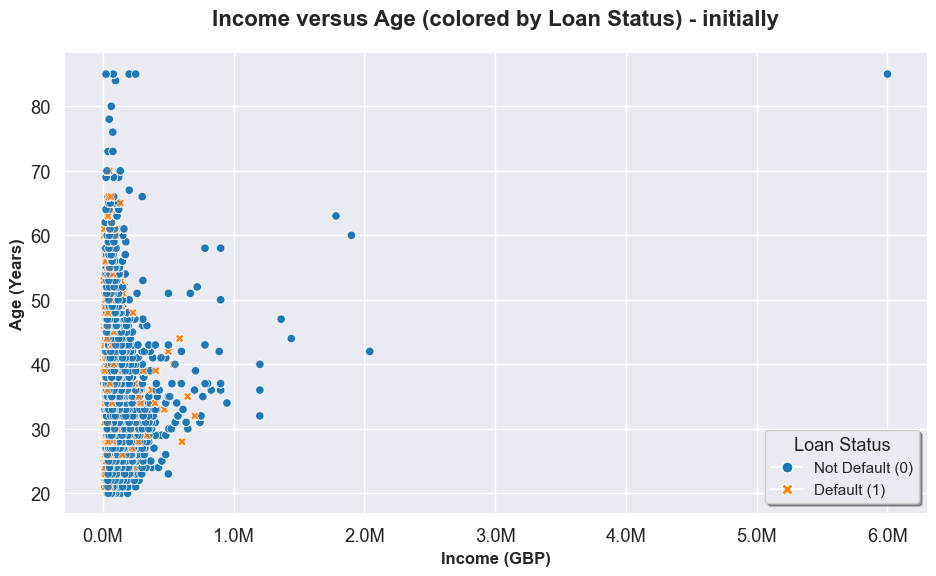

In [12]:
# Set seaborn style
sns.set_theme(style="darkgrid")
sns.set_context("notebook", font_scale=1.2)

# Create the scatter plot using seaborn
plt.figure(figsize=(10, 6))
sns.relplot(x='person_income', y='person_age', data=credit_loan_clean, kind="scatter",
            hue="loan_status", style="loan_status", 
            alpha=0.8, edgecolor='w', linewidth=0.5, height=6, aspect=1.6, legend=False,
            palette={0: "#1f77b4", 1: "#ff7f0e"},  # Blue for Not Default, Orange for Default
            markers={0: "o", 1: "X"})  # Circle for 0, X for 1 to visually distinguish defaults

# Customize x-axis to display income in millions (e.g., 1,000,000 → 1M) for intuitive scale
def format_income_millions(x, pos):
    """Format tick labels: convert large numbers to millions with 'M' suffix"""
    return f'{x / 1e6:.1f}M'
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_income_millions))

# Set labels and title
plt.xlabel('Income (GBP)', fontsize=12, fontweight='bold')
plt.ylabel('Age (Years)', fontsize=12, fontweight='bold')
plt.title('Income versus Age (colored by Loan Status) - initially', fontsize=16, fontweight='bold', pad=20)

# Customize the legend to be more informative
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#1f77b4', markersize=8, label='Not Default (0)'),
    plt.Line2D([0], [0], marker='X', color='w', markerfacecolor='#ff7f0e', markersize=8, label='Default (1)')]

plt.legend(handles=handles, title="Loan Status", fontsize=11, title_fontsize=13,
            loc='best', bbox_to_anchor=(1, 0.2), frameon=True, shadow=True)

# Clean up the visualization
plt.tight_layout()
plt.show()

In [13]:
# From the visualization, it can be observe that the vast majority of data clusters within an 
# income range of under £0.5M and ages under 70. To ensure the model is trained on relevant data, 
# I will remove non-representative outliers above this range and focuses model training on the core population.
credit_loan_clean = credit_loan_clean[
    (credit_loan_clean['person_income'] < 0.5e6) & (credit_loan_clean['person_age'] < 70)]

<Figure size 1000x600 with 0 Axes>

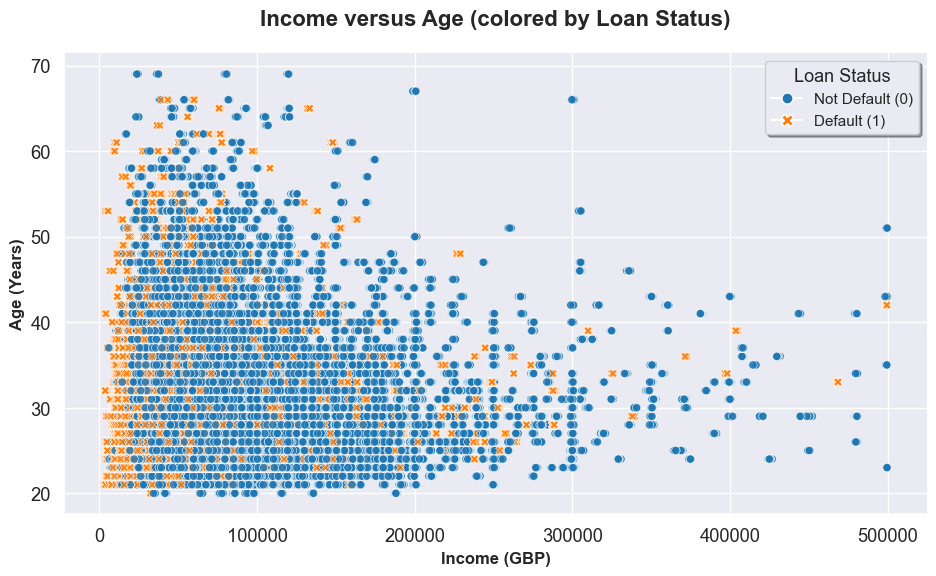

In [14]:
# Set seaborn style
sns.set_theme(style="darkgrid")
sns.set_context("notebook", font_scale=1.2)

# Create the scatter plot using seaborn
plt.figure(figsize=(10, 6))
sns.relplot(x='person_income', y='person_age', data=credit_loan_clean, kind="scatter",
            hue="loan_status", style="loan_status", 
            alpha=0.8, edgecolor='w', linewidth=0.5, height=6, aspect=1.6, legend=False,
            palette={0: "#1f77b4", 1: "#ff7f0e"},  # Blue for Not Default, Orange for Default
            markers={0: "o", 1: "X"})  # Circle for 0, X for 1 to visually distinguish defaults

# Set labels and title
plt.xlabel('Income (GBP)', fontsize=12, fontweight='bold')
plt.ylabel('Age (Years)', fontsize=12, fontweight='bold')
plt.title('Income versus Age (colored by Loan Status)', fontsize=16, fontweight='bold', pad=20)

# Customize the legend to be more informative
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#1f77b4', markersize=8, label='Not Default (0)'),
    plt.Line2D([0], [0], marker='X', color='w', markerfacecolor='#ff7f0e', markersize=8, label='Default (1)')]

plt.legend(handles=handles, title="Loan Status", fontsize=11, title_fontsize=13,
            loc='best', frameon=True, shadow=True)

# Clean up the visualization
plt.tight_layout()
plt.show()

In [15]:
# Define the boundaries (bins) for the age groups (18-35, 36-55, 56-max)
bins_age = [18, 35, 55, np.inf]

# Define the corresponding labels for each bin.
labels_age = ['Young', 'Middle', 'Old']

# Create the new 'age_group' column using pd.cut()
credit_loan_clean['age_group'] = pd.cut(
    credit_loan_clean['person_age'],
    bins=bins_age, labels=labels_age,
    right=True,
    include_lowest=True )

# Define the boundaries (bins) for the income groups
bins_income = [0, 25000, 50000, np.inf]
labels_income = ['Low', 'Middle', 'High']

# Create the new 'income_group' column using pd.cut()
credit_loan_clean['income_group'] = pd.cut(
    credit_loan_clean['person_income'],
    bins=bins_income, labels=labels_income,
    right=True, include_lowest=True)

# Display the head of the modified DataFrame and the counts for the new column
display(credit_loan_clean[(credit_loan_clean['age_group'] == 'Middle') & (credit_loan_clean['income_group'] == 'Low')])

person_age  person_income person_home_ownership  person_emp_length  \
355939        36.0   19821.552224                  RENT               18.0   
23898         36.0   14713.944598                   OWN               18.0   
319980        36.0   23347.063609              MORTGAGE                9.9   
188737        36.0   18012.041540                  RENT               18.0   
446836        36.0   21683.120011                   OWN                6.4   
...            ...            ...                   ...                ...   
395035        55.0   23986.297762                  RENT               28.6   
161018        55.0   24544.384145                  RENT               14.0   
496115        55.0   24761.131498                  RENT               18.2   
433038        55.0   23135.917345                  RENT                8.4   
403601        55.0   24419.015857                  RENT                0.3   

            loan_intent loan_grade    loan_amnt  loan_int_rate  loan_status  \
355939         PERSONAL          B  5131.180918         11.221            1   
23898   HOMEIMPROVEMENT          C  4974.955604         13.165            1   
319980          VENTURE          B  6134.932057         10.542            0   
188737         PERSONAL          C  1222.075323         12.522            0   
446836          VENTURE          A  2074.204300          9.132            0   
...                 ...        ...          ...            ...          ...   
395035          VENTURE          C  4110.233916         13.219            0   
161018          VENTURE          C  4041.367043         13.167            0   
496115          VENTURE          C  4016.079689         13.231            0   
433038          VENTURE          C  4060.429065         13.096            0   
403601          VENTURE          C  3894.834531         13.119            0   

        loan_percent_income cb_person_default_on_file  \
355939             0.250776                         N   
23898              0.328855                         N   
319980             0.258349                         N   
188737             0.070788                         N   
446836             0.100126                         N   
...                     ...                       ...   
395035             0.159624                         Y   
161018             0.159706                         Y   
496115             0.159538                         Y   
433038             0.160356                         Y   
403601             0.160684                         Y   

        cb_person_cred_hist_length         country    region         city  \
355939                   10.965737  United Kingdom  Scotland    Edinburgh   
23898                    10.950209  United Kingdom   England    Liverpool   
319980                   16.005708  United Kingdom   England  Southampton   
188737                   14.950777  United Kingdom   England        Leeds   
446836                   11.998066  United Kingdom   England       London   
...                            ...             ...       ...          ...   
395035                   27.023445  United Kingdom   England    Sheffield   
161018                   26.972404  United Kingdom   England        Leeds   
496115                   27.011338  United Kingdom   England    Liverpool   
433038                   26.995432  United Kingdom   England       London   
403601                   26.987288  United Kingdom   England    Liverpool   

        gender  marriage_status interest_rate_band age_group income_group  
355939    Male                1           9.5-11.5    Middle          Low  
23898     Male                0          11.5-14.9    Middle          Low  
319980  Female                1           9.5-11.5    Middle          Low  
188737  Female                0          11.5-14.9    Middle          Low  
446836    Male                0            7.5-9.5    Middle          Low  
...        ...              ...                ...      

In [16]:
# Calculate median loan_int_rate grouped by key characteristics
median_rate_by_group = credit_loan_clean.groupby(
    ['person_emp_length', 'age_group', 'income_group', 'gender', 'marriage_status', 'loan_grade', 'loan_intent'],
    observed=True)['loan_int_rate'].median().reset_index(name='Median_Loan_Int_Rate')

# Convert the grouped medians into a mapping dictionary
median_loan_dict = {
    tuple(row[['person_emp_length', 'age_group', 'income_group', 'gender', 
               'marriage_status', 'loan_grade', 'loan_intent']]): 
    row['Median_Loan_Int_Rate']
    for _, row in median_rate_by_group.iterrows()}

# Map the medians to fill missing loan_int_rate values
credit_loan_clean['loan_int_rate'] = credit_loan_clean.apply(
    lambda x: median_loan_dict.get(
        (x['person_emp_length'], x['age_group'], x['income_group'], x['gender'], 
         x['marriage_status'], x['loan_grade'], x['loan_intent']),
         x['loan_int_rate']), axis=1)

# Re-check for missing values
print(credit_loan_clean['loan_int_rate'].isna().sum())

3519


In [17]:
# Drop any remaining rows with missing loan_int_rate
credit_loan_clean = credit_loan_clean.dropna(subset=['loan_int_rate'])

# Create a mapping function for interest rate bands
def map_interest_rate_band(rate):
    if rate <= 7.5:
        return '6.4-7.5%'
    elif 7.5 < rate < 9.5:
        return '7.5-9.5%'
    elif 9.5 < rate <= 11.5:
        return '9.5-11.5%'
    else:
        return '11.5-14.9%'

# Apply the mapping function to create 'interest_rate_band' column
credit_loan_clean['interest_rate_band'] = credit_loan_clean['loan_int_rate'].apply(map_interest_rate_band)

# Final check for missing values and dataset dimensions
display("Remaining missing values in the dataset:", credit_loan_clean.isna().sum())
print(f'Dataset Dimensions after filling missing loan_int_rate: Rows and Columns {credit_loan_clean.shape}')

'Remaining missing values in the dataset:'

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
country                       0
region                        0
city                          0
gender                        0
marriage_status               0
interest_rate_band            0
age_group                     0
income_group                  0
dtype: int64

Dataset Dimensions after filling missing loan_int_rate: Rows and Columns (460578, 20)


# Explolatory Data Analysis (EDA)

In [18]:
# Create a cross table of home ownership, loan status, and grade
display(pd.crosstab([credit_loan_clean['person_home_ownership']], 
                    [credit_loan_clean['loan_status'], credit_loan_clean['loan_grade']]))

loan_status                0                                         1         \
loan_grade                 A      B      C     D     E    F   G      A      B   
person_home_ownership                                                           
MORTGAGE               74133  52818  27469  9222  2404  493   0   3404   4628   
OTHER                    344    383    149    98    18    0   0     41     72   
OWN                    12064  10979   6578  3803   353   94   0    913    483   
RENT                   51142  59702  38070  7686  1964  326  13  10891  18889   

loan_status                                           
loan_grade                 C      D     E     F    G  
person_home_ownership                                 
MORTGAGE                4674   7867  2182   864  412  
OTHER                     87    143    78    30    0  
OWN                      371    243   426   101   77  
RENT                   13916  21887  5874  1345  375

In [19]:
# Create the cross table for loan status, home ownership, and the max employment length
display(pd.crosstab(credit_loan_clean['person_home_ownership'], 
                    [credit_loan_clean['loan_status'], credit_loan_clean['loan_grade']],
                    values=credit_loan_clean['person_emp_length'], aggfunc=['min', 'max', 'mean'], 
                    dropna=False).fillna(0).astype(int))

min                             ... mean                 \
loan_status             0                    1        ...    0        1         
loan_grade              A  B  C  D  E  F  G  A  B  C  ...    E  F  G  A  B  C   
person_home_ownership                                 ...                       
MORTGAGE                0  0  0  0  0  0  0  0  0  0  ...    7  7  0  7  7  7   
OTHER                   0  0  0  0  2  0  0  1  0  0  ...    5  0  0  8  5  7   
OWN                     0  0  0  0  0  0  0  0  0  0  ...    7  7  0  7  7  7   
RENT                    0  0  0  0  0  0  0  0  0  0  ...    7  9  9  7  7  7   

                                   
loan_status                        
loan_grade             D  E  F  G  
person_home_ownership              
MORTGAGE               7  8  7  8  
OTHER                  5  6  7  0  
OWN                    7  7  6  8  
RENT                   7  7  7  7  

[4 rows x 42 columns]

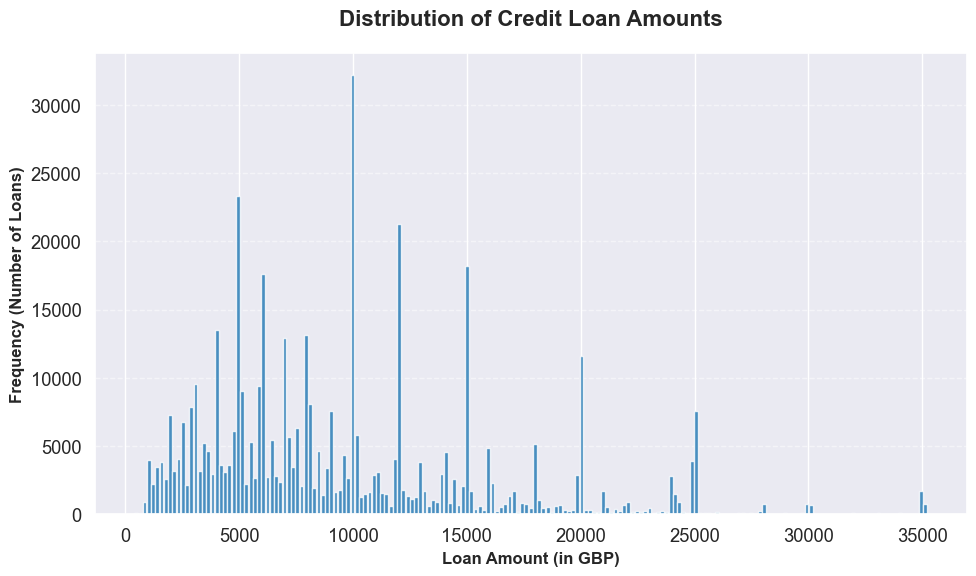

In [20]:
# Look at the distribution of loan amounts with a histogram
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(
    x=credit_loan_clean['loan_amnt'], bins='auto',
    color='#1f77b4', alpha=0.8, rwidth=0.9)
plt.xlabel("Loan Amount (in GBP)", fontsize=12, fontweight='bold')
plt.ylabel("Frequency (Number of Loans)", fontsize=12, fontweight='bold')
plt.title("Distribution of Credit Loan Amounts", fontsize=16, fontweight='bold',
    pad=20)  # Add some padding to separate the title from the plot

# Add a horizontal grid for better readability of the frequency values
plt.grid(axis='y', alpha=0.5, linestyle='--')

# Adjust plot to ensure all elements (labels, title) fit nicely
plt.tight_layout()
plt.show()

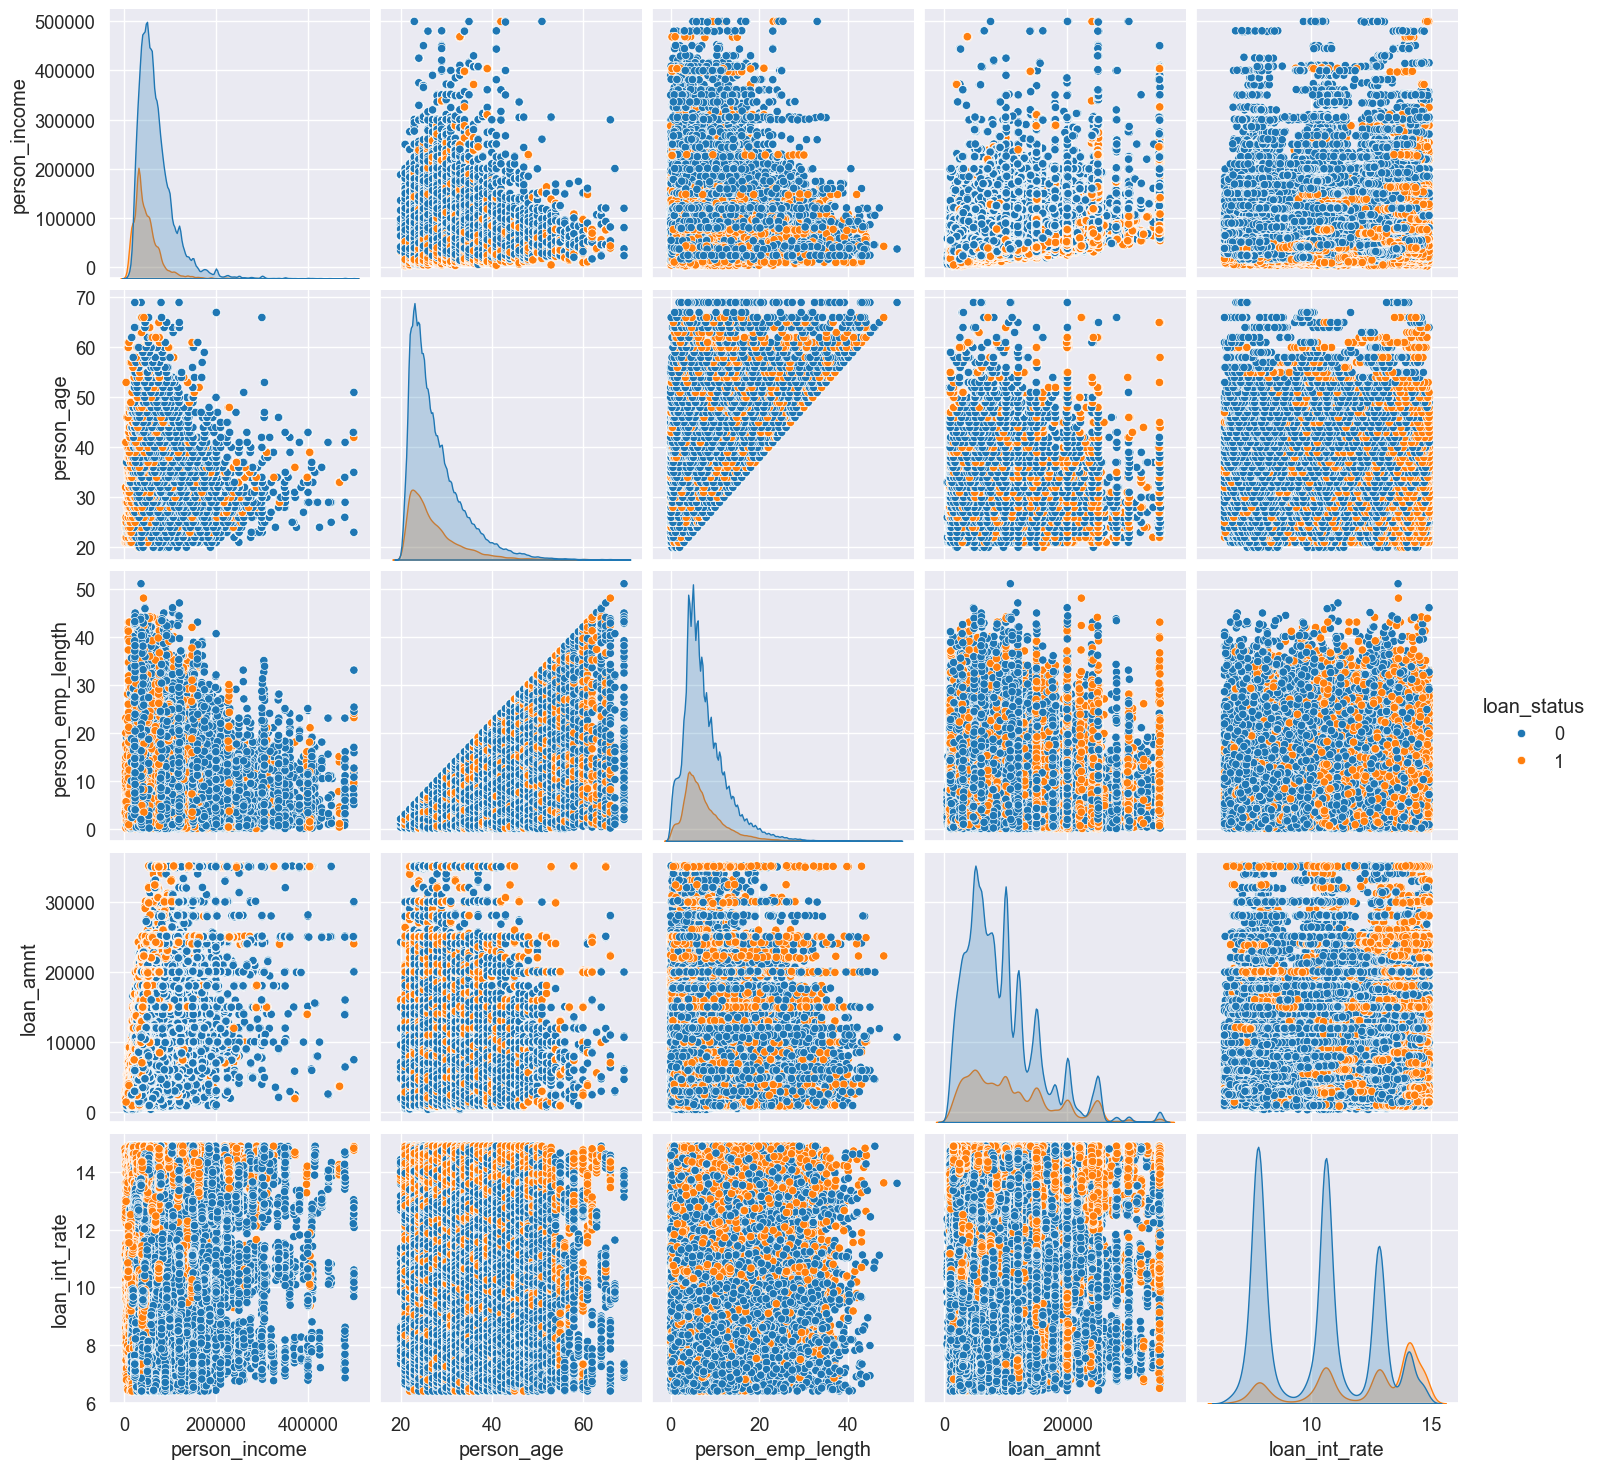

In [21]:
# Create a pairplot for loan status and key numerical variables
sns.pairplot(data=credit_loan_clean, vars=['person_income', 'person_age', 'person_emp_length',
                                            'loan_amnt', 'loan_int_rate'], hue='loan_status',
             palette={0: "#1f77b4", 1: "#ff7f0e"}, height=3, aspect=1)
plt.show()

In [22]:
# Select columns with numerical data types (integers, floats) and store their names in a list
numerical_columns = credit_loan_clean.select_dtypes(include=[np.number]).columns.tolist()

# Select columns with object (string/text) or category data types and store their names in a list
categorical_columns = credit_loan_clean.select_dtypes(include=["object", "category"]).columns.tolist()

# Preview the columns
print(f"Numeric data columns: {numerical_columns}")
print(f"Categorical data columns: {categorical_columns}")

Numeric data columns: ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length', 'marriage_status']
Categorical data columns: ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file', 'country', 'region', 'city', 'gender', 'interest_rate_band', 'age_group', 'income_group']


In [23]:
# Ensure numeric columns use the correct dtype (float64 for calculations)
credit_loan_clean[numerical_columns] = credit_loan_clean[numerical_columns].astype("float64")

# Ensure categorical columns use the 'category' dtype except, city, region, and country
exclude_cols = ["city", "region", "country"]
# Identify object columns eligible for conversion
categorical_columns = credit_loan_clean.select_dtypes(include="object").columns.difference(exclude_cols)
credit_loan_clean[categorical_columns] = credit_loan_clean[categorical_columns].astype("category")

In [24]:
# Re-inspect the information about the dataset
credit_loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 460578 entries, 306184 to 343521
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   person_age                  460578 non-null  float64 
 1   person_income               460578 non-null  float64 
 2   person_home_ownership       460578 non-null  category
 3   person_emp_length           460578 non-null  float64 
 4   loan_intent                 460578 non-null  category
 5   loan_grade                  460578 non-null  category
 6   loan_amnt                   460578 non-null  float64 
 7   loan_int_rate               460578 non-null  float64 
 8   loan_status                 460578 non-null  float64 
 9   loan_percent_income         460578 non-null  float64 
 10  cb_person_default_on_file   460578 non-null  category
 11  cb_person_cred_hist_length  460578 non-null  float64 
 12  country                     460578 non-null  object  
 13 

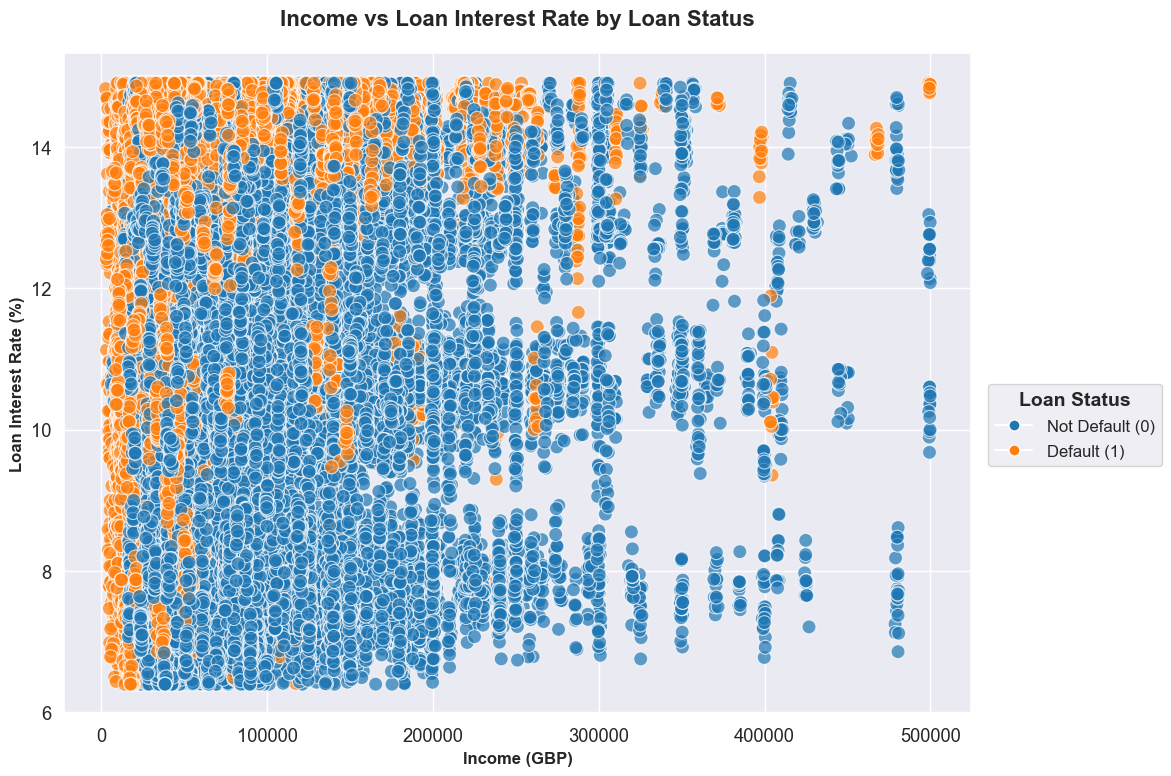

In [25]:
# Set seaborn style
sns.set_theme(style="darkgrid")
sns.set_context("notebook", font_scale=1.2)

# Create the scatter plot using seaborn
plt.figure(figsize=(12, 8))
# Store the scatter plot object (optional, but good practice)
scatter = sns.scatterplot(data=credit_loan_clean, x='person_income', y='loan_int_rate', hue='loan_status', 
                          alpha=0.7, edgecolor='w', s=100, palette=['#1f77b4', '#ff7f0e']) # Added palette to match custom legend colors

plt.title('Income vs Loan Interest Rate by Loan Status', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Income (GBP)', fontsize=12, fontweight='bold')
plt.ylabel('Loan Interest Rate (%)', fontsize=12, fontweight='bold')

# The seaborn scatter plot automatically creates a legend based on 'hue'.
# If you want to use the custom legend, you should remove or suppress the default one.
scatter.legend_.remove() 

# Create custom legend
# Note: When using custom elements, ensure the markerfacecolor matches the hue colors used in sns.scatterplot
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#1f77b4', markersize=8, label='Not Default (0)'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#ff7f0e', markersize=8, label='Default (1)')]

# Add legend with bold title
# The FIX is here: separate the legend creation from the title/label setting.
legend = plt.legend(handles=legend_elements, title='Loan Status',
    loc='best',
    bbox_to_anchor=(1.21, 0.5), borderaxespad=0)

# Set legend title properties
# Call .set_fontweight() and .set_fontsize() on the result of .get_title()
legend.get_title().set_fontweight('bold')
legend.get_title().set_fontsize(14)

# Set legend label properties
for text in legend.get_texts():
    text.set_fontsize(12)

plt.tight_layout()
plt.show()

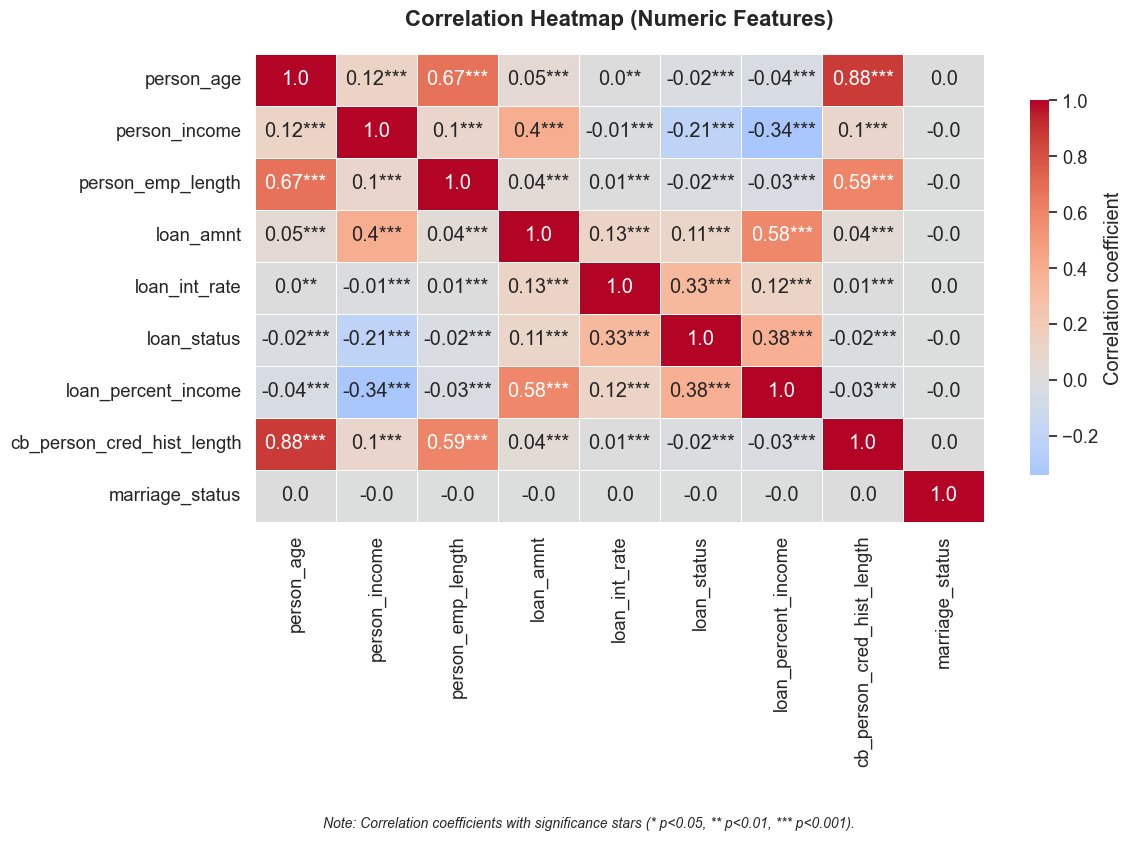

In [26]:
from scipy import stats

# Correlation matrix heatmap for numerical features
if len(numerical_columns) >= 2:
    # Compute correlation matrix
    corr = credit_loan_clean[numerical_columns].corr(numeric_only=True)

    # Compute p-values
    pvals = pd.DataFrame(index=numerical_columns, columns=numerical_columns, dtype=float)
    for i in numerical_columns:
        for j in numerical_columns:
            if i == j:
                pvals.loc[i, j] = np.nan
            else:
                _, p = stats.pearsonr(credit_loan_clean[i], credit_loan_clean[j])
                pvals.loc[i, j] = p

    # Function for significance stars
    def stars(p):
        if p < 0.001: return "***"
        elif p < 0.01: return "**"
        elif p < 0.05: return "*"
        else: return ""

    # Build annotation DataFrame with corr + stars
    annot = corr.round(2).astype(str)
    for i in numerical_columns:
        for j in numerical_columns:
            if i != j and not pd.isna(pvals.loc[i, j]):
                annot.loc[i, j] += stars(pvals.loc[i, j])

    # Plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        corr,
        annot=annot,        
        fmt="",            
        cmap="coolwarm",
        center=0,
        linewidths=0.5,
        cbar_kws={"shrink": 0.8, "label": "Correlation coefficient"}
    )
    plt.xticks(rotation=90)

    # Title & caption
    plt.title("Correlation Heatmap (Numeric Features)", fontsize=16, fontweight="bold", pad=20)
    plt.figtext(0.5, -0.05,
        "Note: Correlation coefficients with significance stars (* p<0.05, ** p<0.01, *** p<0.001).",
        wrap=True, ha="center", fontsize=10, style="italic")

    plt.tight_layout()
    plt.show()

In [27]:
# Select numeric columns
numeric_cols = credit_loan_clean.select_dtypes(include='number').columns
target = 'loan_status'

# Compute correlation + p-value
results = []
for col in numeric_cols:
    if col == target: 
        continue
    x = credit_loan_clean[col]
    y = credit_loan_clean[target]
    mask = x.notna() & y.notna()
    if mask.sum() < 2:
        results.append({'Feature': col, 'Correlation': np.nan, 'P-value': np.nan, 'Sig.': ''})
        continue
    corr, p = stats.pearsonr(x[mask], y[mask])
    sig = '***' if p < 0.001 else '**' if p < 0.01 else '*' if p < 0.05 else ''
    results.append({'Feature': col, 'Correlation': round(corr, 4), 'P-value': round(p, 4), 'Sig.': sig})

# Create and print table
result_df = pd.DataFrame(results).set_index('Feature').sort_values(by='Correlation', key=abs, ascending=False)
print(result_df)
print("\nSignificance: *** p<0.001, ** p<0.01, * p<0.05")

                            Correlation  P-value Sig.
Feature                                              
loan_percent_income              0.3800    0.000  ***
loan_int_rate                    0.3262    0.000  ***
person_income                   -0.2077    0.000  ***
loan_amnt                        0.1085    0.000  ***
person_age                      -0.0236    0.000  ***
person_emp_length               -0.0203    0.000  ***
cb_person_cred_hist_length      -0.0183    0.000  ***
marriage_status                 -0.0009    0.564     

Significance: *** p<0.001, ** p<0.01, * p<0.05


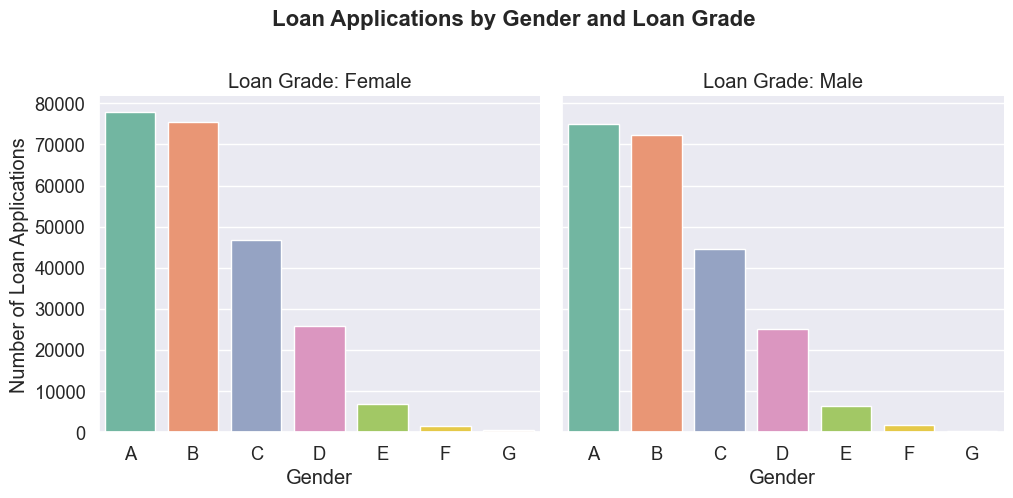

In [28]:
# Create categorical plot for loan grade and gender
a = sns.catplot(x='loan_grade', col = 'gender', kind = 'count', data=credit_loan_clean, hue='loan_grade',
            palette='Set2', height=5, aspect=1., col_wrap=3, legend=False)
a.set_axis_labels(x_var="Gender", y_var="Number of Loan Applications") 
a.set_titles(col_template="Loan Grade: {col_name}")
a.fig.suptitle('Loan Applications by Gender and Loan Grade', x=0.35, y=1.0, fontsize=16, fontweight='bold')
a.fig.tight_layout()
plt.show()

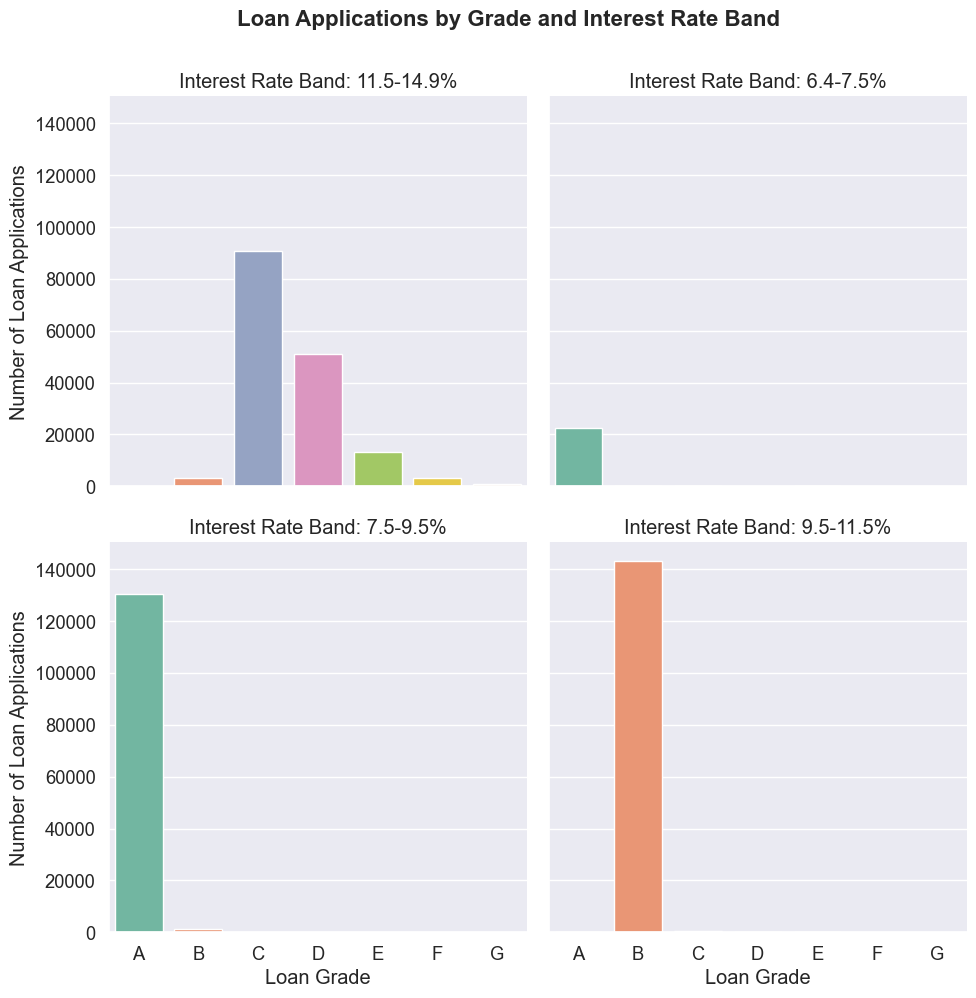

In [29]:
# Create categorical plot for loan grade and interest rate band
b = sns.catplot(x='loan_grade', col = 'interest_rate_band', kind = 'count', data=credit_loan_clean, hue='loan_grade',
            palette='Set2', height=5, aspect=1., col_wrap=2, legend=False)
b.set_axis_labels(x_var="Loan Grade", y_var="Number of Loan Applications") 
b.set_titles(col_template="Interest Rate Band: {col_name}")
b.fig.suptitle('Loan Applications by Grade and Interest Rate Band', x=0.52, y=1.0, fontsize=16, fontweight='bold')
b.fig.tight_layout()
plt.show()

# Splitting Training and Test set

In [30]:
# Import library needed for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [31]:
# Create X and Y for the model
# X = credit_loan_clean[numerical_columns].drop(columns=['loan_status'])
# print(credit_loan_clean[numerical_columns])
# Create two data sets for numeric and non-numeric data
credit_num = credit_loan_clean.select_dtypes(exclude=['object', 'category'])
credit_str = credit_loan_clean.select_dtypes(include=['object', 'category'])
print(f"Warning: Found {len(credit_str.columns)} non-numeric columns: {list(credit_str.columns)}")

# Drop all columns EXCEPT 'city' and 'gender'
# credit_str = credit_str.drop(columns=[col for col in credit_str.columns if col not in ['gender', 'city']])
credit_str = credit_str[['gender', 'loan_intent', 'loan_grade']]

# One-hot encode the non-numeric columns
credit_str_onehot = pd.get_dummies(credit_str, columns=['gender', 'loan_intent', 'loan_grade'], drop_first=True)

# Union the one-hot encoded columns to the numeric ones
credit_loan_prep = pd.concat([credit_num , credit_str_onehot], axis=1)

# Print the columns in the new data set
print(credit_loan_prep.columns)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'marriage_status', 'gender_Male',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E',
       'loan_grade_F', 'loan_grade_G'],
      dtype='object')


# Logistic Regression

In [32]:
# Create the X and y data sets
X = credit_loan_prep.drop(columns=['loan_status'])
y = credit_loan_prep['loan_status']

# Use train_test_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)

# Scale features (prevents convergence issues where the optimization process didn’t find stable coefficient values)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression
clf_logistic_multi = LogisticRegression(solver='lbfgs', max_iter=5000).fit(X_train_scaled, np.ravel(y_train))

# Display coefficients with feature names
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': clf_logistic_multi.coef_[0]})

# Set pandas to display all rows
pd.set_option('display.max_rows', None)

# Print the full table
print(coefficients)

                        Feature  Coefficient
0                    person_age    -0.027992
1                 person_income    -0.046610
2             person_emp_length    -0.020952
3                     loan_amnt    -0.647308
4                 loan_int_rate     0.323470
5           loan_percent_income     1.343471
6    cb_person_cred_hist_length     0.011593
7               marriage_status    -0.002431
8                   gender_Male    -0.010004
9         loan_intent_EDUCATION    -0.365849
10  loan_intent_HOMEIMPROVEMENT    -0.029671
11          loan_intent_MEDICAL    -0.066390
12         loan_intent_PERSONAL    -0.248925
13          loan_intent_VENTURE    -0.462286
14                 loan_grade_B     0.063799
15                 loan_grade_C     0.084409
16                 loan_grade_D     0.660628
17                 loan_grade_E     0.405274
18                 loan_grade_F     0.235056
19                 loan_grade_G     0.318478


## Logistic Regression (Coefficients importance)

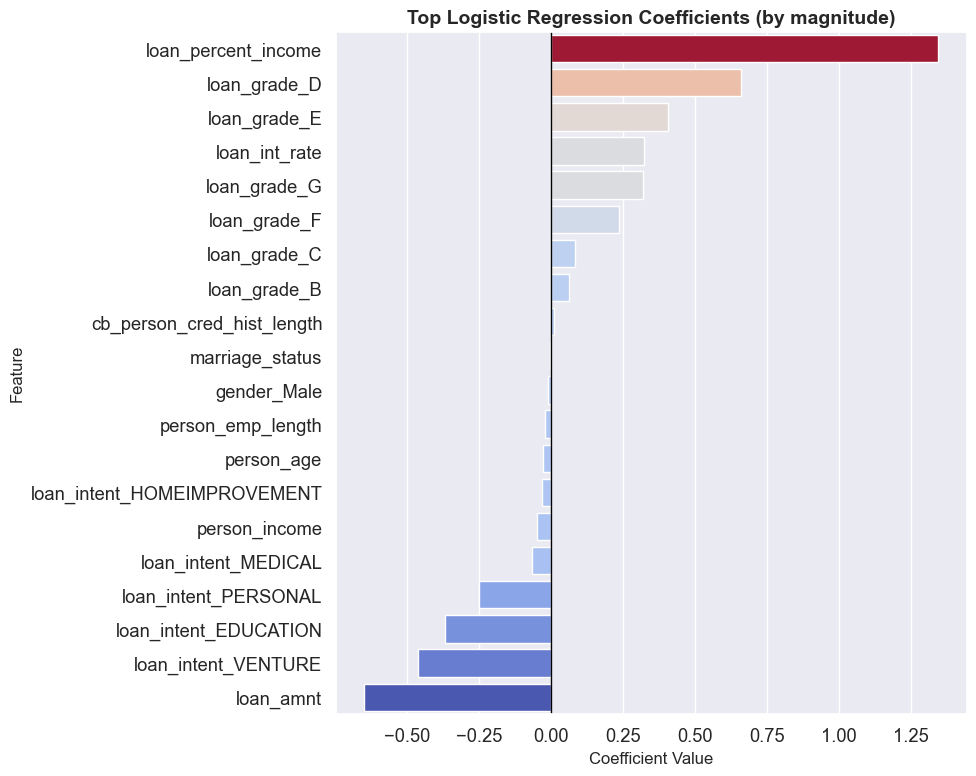

In [ ]:
# Sort coefficients by magnitude
coefficients_sorted = coefficients.sort_values(by='Coefficient', ascending=False)

# Visualize Logistic Coefficients
plt.figure(figsize=(12, 8))
sns.barplot(
    data=coefficients_sorted,
    x='Coefficient',
    y='Feature',
    palette='coolwarm',
    hue='Coefficient',
    dodge=False,
    legend=False)

plt.title('Top Logistic Regression Coefficients (by magnitude)', fontsize=14, weight='bold')
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.axvline(0, color='black', linewidth=1)
plt.tight_layout()
plt.show()

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

# Create predictions of probability for loan status using test data
preds = clf_logistic_multi.predict_proba(X_test_scaled)

# Create dataframe for the probabilities of default (class = 1)
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])
true_df = y_test

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1).head())

   loan_status  prob_default
0          0.0      0.058373
1          0.0      0.031709
2          0.0      0.039192
3          1.0      0.712603
4          1.0      0.063535


In [35]:
# Check the length before printing the report:
print(f"Length of y_test: {len(y_test)}")
print(f"Length of preds df: {len(preds_df)}")

Length of y_test: 184232
Length of preds df: 184232


In [36]:
# Create a dataframe for the probabilities of default
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold (at what point a probability is a default)
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

# Print the results dataframe
print(preds_df.head())

   prob_default  loan_status
0      0.058373            0
1      0.031709            0
2      0.039192            0
3      0.712603            1
4      0.063535            0


## Classification report and Confusion matrix

In [37]:
from sklearn.metrics import classification_report

# Print the row counts for each loan status
print(preds_df['loan_status'].value_counts())

# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))

# Optional: Print the raw metrics for clarity
report = classification_report(y_test, preds_df['loan_status'], target_names=target_names, output_dict=True)
print("\n--- Key Metrics Extracted ---")
# Precision, Recall, and F1-score for the positive class (e.g., 'Default' or the class of interest)
print(f"Precision (Default): {report['Default']['precision']:.4f}")
print(f"Recall (Default): {report['Default']['recall']:.4f}")
print(f"F1-Score (Default): {report['Default']['f1-score']:.4f}")
print(f"Accuracy: {report['accuracy']:.4f}")

loan_status
0    156088
1     28144
Name: count, dtype: int64
              precision    recall  f1-score   support

 Non-Default       0.87      0.94      0.91    143993
     Default       0.72      0.50      0.59     40239

    accuracy                           0.85    184232
   macro avg       0.80      0.72      0.75    184232
weighted avg       0.84      0.85      0.84    184232


--- Key Metrics Extracted ---
Precision (Default): 0.7185
Recall (Default): 0.5025
F1-Score (Default): 0.5914
Accuracy: 0.8483


In [38]:
from sklearn.metrics import precision_recall_fscore_support

# Store the number of loan defaults from the prediction data
num_defaults = preds_df['loan_status'].value_counts()[1]

# Store the default recall from the classification report
default_recall = precision_recall_fscore_support(y_test,preds_df['loan_status'])[1][1]

# Print the result
print(num_defaults)
print(default_recall)

# Average loan amount
avg_loan_amnt = credit_loan_clean['loan_amnt'].mean()

28144
0.5025224284897736


[[136070   7923]
 [ 20018  20221]]


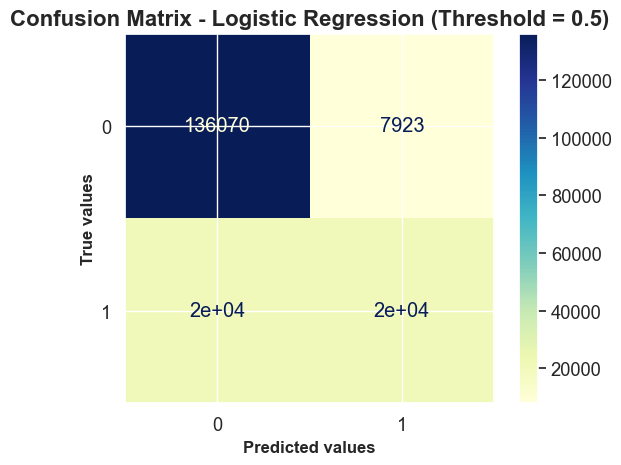

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Print the confusion matrix
print(confusion_matrix(y_test,preds_df['loan_status']))

# Visualize the matrix
cm = confusion_matrix(y_test, preds_df['loan_status'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='YlGnBu') # Optional: cmap='viridis', 'cividis', 'magma', 'rocket', YlGnBu', 'Blues'
plt.title('Confusion Matrix - Logistic Regression (Threshold = 0.5)', loc='center', fontweight='bold', fontsize=16)
plt.xlabel('Predicted values', fontweight='bold', fontsize=12)
plt.ylabel('True values', fontweight='bold', fontsize=12)
plt.show()

In [40]:
# Count how many loans the model predicted as "default" (class = 1)
num_defaults = preds_df['loan_status'].value_counts()[1]

# Store the key classification metric values from the classification report 
precision, recall, fscore, support = precision_recall_fscore_support(y_test, preds_df['loan_status'], pos_label=1, average=None)

# Extract information specific to the "default" class (class = 1)
# 'support[1]' = the number of ACTUAL defaults in the test data (true count of class 1).
# 'recall[1]' = recall for class 1 → proportion of actual defaults correctly identified by the model.
actual_defaults = support[1]
default_recall = recall[1]
# Calculate True Positives (actual defaults correctly predicted)
true_positives = default_recall * actual_defaults

# Estimate the financial loss from missed defaults (false negatives)
# (1 - default_recall) gives the FRACTION of actual defaults that were missed
# The number of defaults MISSED by the model is (1 - default_recall) * (Actual Defaults)
missed_defaults = actual_defaults * (1 - default_recall)  # How many actual defaults were missed
estimated_missed_loss = missed_defaults * avg_loan_amnt   # Each missed default is assumed to lose the average loan amount → total estimated loss

# Display the results in a clear, readable format
print("--- Loan Default Impact Analysis ---")
print(f"1. Predicted Defaults (predicted class = 1): {num_defaults:,} ≈ TP + FP")
print(f"2. Actual Defaults in Test Data (support for class 1): {actual_defaults:,} ≈ TP + FN")
print(f"3. Recall for Default class (how many actual defaults were caught): {default_recall:.4f}")
print(f"4. Number of Actual Defaults CAPTURED (true positives): {true_positives:,.0f}")
print("-" * 35)
print(f"4. Average Loan Amount (avg_loan_amnt): ${avg_loan_amnt:,.2f}")
print("-" * 35)
print("5. Estimated Financial Impact (Loss):")
print(f"   - Number of Actual Defaults MISSED (false negatives): {missed_defaults:,.0f} loans")
print(f"   - Estimated Loss on Missed Defaults (estimate): ${estimated_missed_loss:,.2f}")

--- Loan Default Impact Analysis ---
1. Predicted Defaults (predicted class = 1): 28,144 ≈ TP + FP
2. Actual Defaults in Test Data (support for class 1): 40,239 ≈ TP + FN
3. Recall for Default class (how many actual defaults were caught): 0.5025
4. Number of Actual Defaults CAPTURED (true positives): 20,221
-----------------------------------
4. Average Loan Amount (avg_loan_amnt): $9,583.51
-----------------------------------
5. Estimated Financial Impact (Loss):
   - Number of Actual Defaults MISSED (false negatives): 20,018 loans
   - Estimated Loss on Missed Defaults (estimate): $191,842,721.95


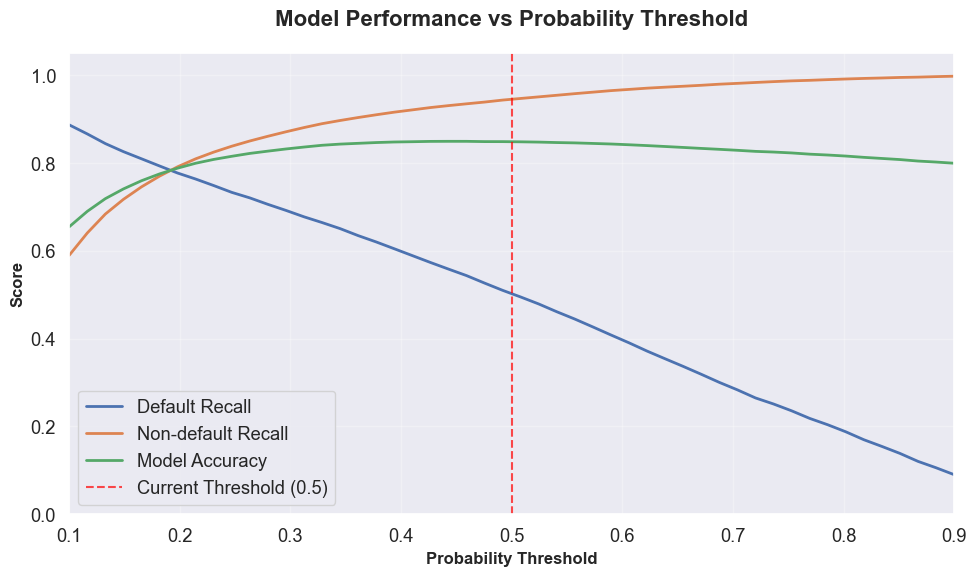


--- Metrics at Threshold = 0.5 ---
Default Recall: 0.5025
Non-default Recall: 0.9450
Accuracy: 0.8483


In [41]:
from sklearn.metrics import recall_score, accuracy_score

# Define a range of thresholds to test
thresholds = np.linspace(0.1, 0.9, 50)

# Initialize lists to store metrics
default_recalls = []
non_default_recalls = []
accuracies = []

# Calculate metrics for each threshold
for threshold in thresholds:
    # Create predictions based on current threshold using prob_default
    y_pred_threshold = (preds_df['prob_default'] >= threshold).astype(int)
    
    # Calculate recall for each class
    default_recall = recall_score(y_test, y_pred_threshold, pos_label=1)
    non_default_recall = recall_score(y_test, y_pred_threshold, pos_label=0)
    accuracy = accuracy_score(y_test, y_pred_threshold)
    
    # Store metrics
    default_recalls.append(default_recall)
    non_default_recalls.append(non_default_recall)
    accuracies.append(accuracy)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, default_recalls, label='Default Recall', linewidth=2)
plt.plot(thresholds, non_default_recalls, label='Non-default Recall', linewidth=2)
plt.plot(thresholds, accuracies, label='Model Accuracy', linewidth=2)

# Add vertical line at threshold = 0.5
plt.axvline(x=0.5, color='red', linestyle='--', linewidth=1.5, alpha=0.7, label='Current Threshold (0.5)')

plt.xlabel('Probability Threshold', fontsize=12, fontweight='bold')
plt.ylabel('Score', fontsize=12, fontweight='bold')
plt.title('Model Performance vs Probability Threshold', fontsize=16, fontweight='bold', loc='center', pad=20)
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.xlim(0.1, 0.9)
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()

# Print metrics at threshold = 0.5 for reference
print("\n--- Metrics at Threshold = 0.5 ---")
y_pred_05 = (preds_df['prob_default'] >= 0.5).astype(int)
print(f"Default Recall: {recall_score(y_test, y_pred_05, pos_label=1):.4f}")
print(f"Non-default Recall: {recall_score(y_test, y_pred_05, pos_label=0):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_05):.4f}")

Correctly predicted 47% of the default and incorrectly predicted 96% of defaults

Imagine that we have 50 thousand loans in our portfolio, and they each have a total loan amount of 50 dollars. As seen in the classification report, this model has a default recall of 4 percent. So, that means we correctly predicted 4 percent of defaults, and incorrectly predicted 96 percent of defaults. If all of our true default loans defaulted right now, our estimated loss from the portfolio would be 2.4 million dollars! This loss would be something we didn't plan for, and would be unexpected.



## ROC curve

0.8483379651743453


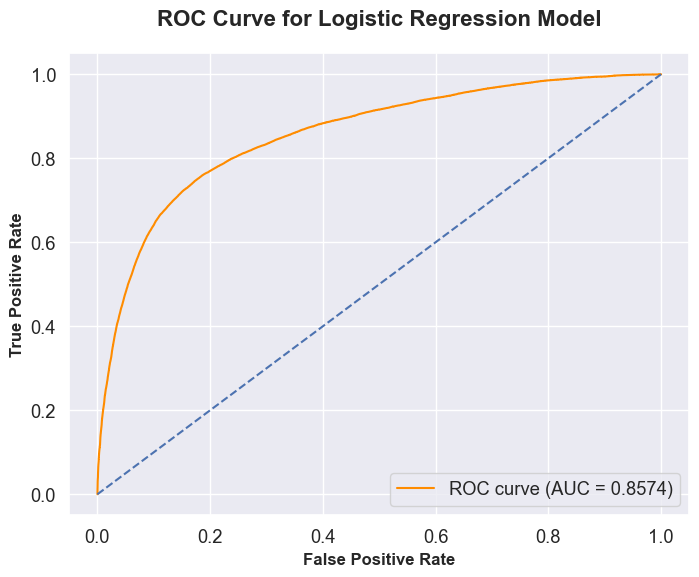

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score

# Create predictions using the SCALED test data and store them in a variable
preds = clf_logistic_multi.predict_proba(X_test_scaled)

# Print the accuracy score the model
print(clf_logistic_multi.score(X_test_scaled, y_test))

# Plot the ROC curve of the probabilities of default
prob_default = preds[:, 1]
# Compute the AUC and store it in a variable
roc_auc = roc_auc_score(y_test, prob_default)
fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)
plt.figure(figsize=(8, 6))
plt.plot(fallout, sensitivity, color = 'darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve for Logistic Regression Model', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.legend(loc='lower right')
plt.show()

# Optional: Other way (display score and darker theme)
# fpr, tpr, thresholds = roc_curve(y_test, preds_df['prob_default'])
# roc_auc = roc_auc_score(y_test, preds_df['prob_default'])

#plt.figure(figsize=(8, 6))
#plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
#plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plt.xlabel('False Positive Rate', fontsize=12)
#plt.ylabel('True Positive Rate', fontsize=12)
#plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14, weight='bold')
#plt.legend(loc='lower right')
#plt.grid(True)
#plt.tight_layout()
#plt.show()

# Decision Trees (XGBoost)

In [43]:
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier

# Train a model
clf_gbt = xgb.XGBClassifier(max_depth=5).fit(X_train_scaled, np.ravel(y_train))

# Predict with a model
gbt_preds = clf_gbt.predict_proba(X_test_scaled)

# Create dataframes of first five predictions, and first five true labels
gbt_preds_df = pd.DataFrame(gbt_preds[:,1], columns = ['prob_default'])
gbt_true_df = y_test

# Concatenate and print the two data frames for comparison
print(pd.concat([gbt_true_df.reset_index(drop = True), gbt_preds_df], axis = 1).head())

   loan_status  prob_default
0          0.0      0.037348
1          0.0      0.003761
2          0.0      0.046716
3          1.0      0.918483
4          1.0      0.081980


In [44]:
# Check the length before printing the report:
print(f"Length of y_test: {len(y_test)}")
print(f"Length of preds df: {len(gbt_preds_df)}")

Length of y_test: 184232
Length of preds df: 184232


In [45]:
# Reassign loan status based on the threshold (at what point a probability is a default)
gbt_preds_df['loan_status'] = gbt_preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

# Print the results dataframe
print(gbt_preds_df.head())

   prob_default  loan_status
0      0.037348            0
1      0.003761            0
2      0.046716            0
3      0.918483            1
4      0.081980            0


## Gradient boosted trees (Coefficients importance)

In [46]:
# Get feature importances (gain by default)
importances = clf_gbt.feature_importances_

# Create a DataFrame to display nicely
coefficients = pd.DataFrame({
    'Feature': X.columns,  # or X_test.columns
    'Importance': importances}).sort_values(by='Importance', ascending=False)

# Print the result
print(coefficients.head())

                        Feature  Importance
4                 loan_int_rate    0.202389
5           loan_percent_income    0.159718
13          loan_intent_VENTURE    0.080006
10  loan_intent_HOMEIMPROVEMENT    0.078742
9         loan_intent_EDUCATION    0.070200


In [47]:
# Get importance via booster
importance_dict = clf_gbt.get_booster().get_score(importance_type='weight') # OR use 'gain', 'cover', etc.

# Map feature indices (f0, f1, ...) back to real column names
importance_df = pd.DataFrame({
    'Feature': [X.columns[int(f[1:])] for f in importance_dict.keys()],
    'Importance': importance_dict.values()}).sort_values(by='Importance', ascending=False)

# Print the result
print(importance_df.head())

               Feature  Importance
1        person_income       529.0
5  loan_percent_income       427.0
0           person_age       381.0
3            loan_amnt       368.0
4        loan_int_rate       281.0


<Figure size 1600x1200 with 0 Axes>

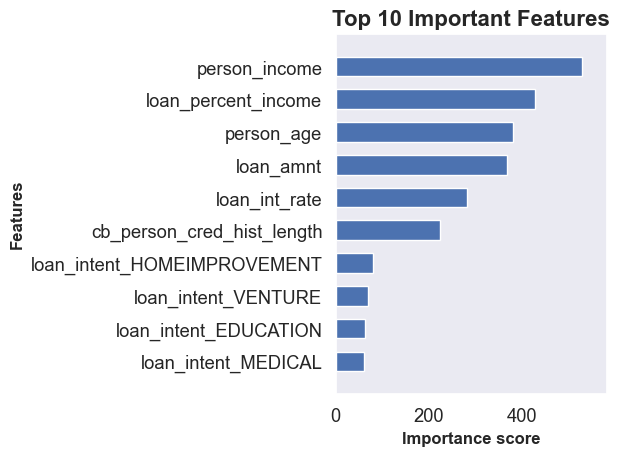

In [48]:
# Plot importance features name
plt.figure(figsize=(16, 12))
xgb.plot_importance(clf_gbt,
    importance_type='weight',           
    max_num_features=10,              
    height=0.6,
    xlabel='Importance', ylabel='Features', title='Top 10 Important Features',
    show_values=False, grid=False)

# Fix labels to show real feature names (not f0, f1...)
ax = plt.gca()
feature_names = [X.columns[i] for i in range(len(X.columns))]
ax.set_yticklabels([feature_names[int(label.get_text()[1:])] for label in ax.get_yticklabels()])
plt.title("Top 10 Important Features", loc='center', fontweight='bold', fontsize=16)
plt.xlabel("Importance score", fontweight='bold', fontsize=12)
plt.ylabel("Features", fontweight='bold', fontsize=12)
plt.tight_layout()
plt.show()

## Classification report and Confusion matrix (Gradient boosted trees)

In [49]:
# Print the classification report of the model
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds_df['loan_status'], target_names=target_names))

# Optional: Print the raw metrics for clarity
report = classification_report(y_test, gbt_preds_df['loan_status'], target_names=target_names, output_dict=True)
print("\n--- Key Metrics Extracted ---")
# Precision, Recall, and F1-score for the positive class (e.g., 'Default' or the class of interest)
print(f"Precision (Default): {report['Default']['precision']:.4f}")
print(f"Recall (Default): {report['Default']['recall']:.4f}")
print(f"F1-Score (Default): {report['Default']['f1-score']:.4f}")
print(f"Accuracy: {report['accuracy']:.4f}")

              precision    recall  f1-score   support

 Non-Default       0.92      0.96      0.94    143993
     Default       0.84      0.70      0.76     40239

    accuracy                           0.90    184232
   macro avg       0.88      0.83      0.85    184232
weighted avg       0.90      0.90      0.90    184232


--- Key Metrics Extracted ---
Precision (Default): 0.8368
Recall (Default): 0.6991
F1-Score (Default): 0.7618
Accuracy: 0.9045


In [50]:
# Store the number of loan defaults from the prediction data
num_defaults = gbt_preds_df['loan_status'].value_counts()[1]

# Store the default recall from the classification report
default_recall = precision_recall_fscore_support(y_test, gbt_preds_df['loan_status'])[1][1]

# Average loan amount
avg_loan_amnt = credit_loan_clean['loan_amnt'].mean()

[[138508   5485]
 [ 12108  28131]]


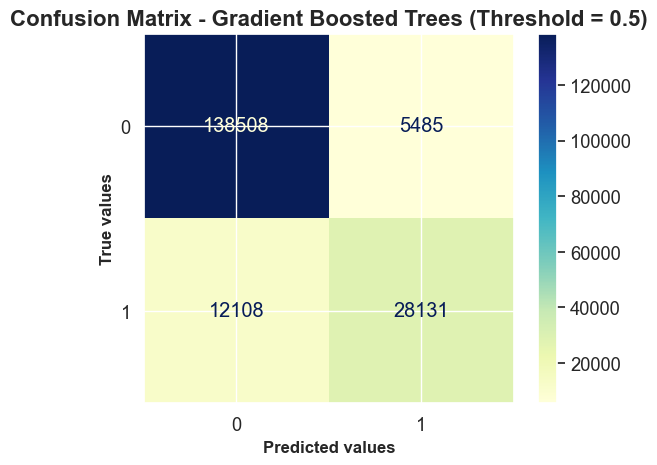

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Print the confusion matrix
print(confusion_matrix(y_test,gbt_preds_df['loan_status']))

# Visualize the matrix
cm = confusion_matrix(y_test, gbt_preds_df['loan_status'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='YlGnBu') # Optional: cmap='viridis', 'cividis', 'magma', 'rocket', YlGnBu', 'Blues'
plt.title('Confusion Matrix - Gradient Boosted Trees (Threshold = 0.5)', loc='center', fontweight='bold', fontsize=16)
plt.xlabel('Predicted values', fontweight='bold', fontsize=12)
plt.ylabel('True values', fontweight='bold', fontsize=12)
plt.show()

In [52]:
# Count how many loans the model predicted as "default" (class = 1)
num_defaults = gbt_preds_df['loan_status'].value_counts()[1]

# Store the key classification metric values from the classification report 
precision, recall, fscore, support = precision_recall_fscore_support(y_test, gbt_preds_df['loan_status'], pos_label=1, average=None)

# Extract information specific to the "default" class (class = 1)
# 'support[1]' = the number of ACTUAL defaults in the test data (true count of class 1).
# 'recall[1]' = recall for class 1 → proportion of actual defaults correctly identified by the model.
actual_defaults = support[1]
default_recall = recall[1]
# Calculate True Positives (actual defaults correctly predicted)
true_positives = default_recall * actual_defaults

# Estimate the financial loss from missed defaults (false negatives)
# (1 - default_recall) gives the FRACTION of actual defaults that were missed
# The number of defaults MISSED by the model is (1 - default_recall) * (Actual Defaults)
missed_defaults = actual_defaults * (1 - default_recall)  # How many actual defaults were missed
estimated_missed_loss = missed_defaults * avg_loan_amnt   # Each missed default is assumed to lose the average loan amount → total estimated loss

# Display the results in a clear, readable format
print("--- Loan Default Impact Analysis ---")
print(f"1. Predicted Defaults (predicted class = 1): {num_defaults:,} ≈ TP + FP")
print(f"2. Actual Defaults in Test Data (support for class 1): {actual_defaults:,} ≈ TP + FN")
print(f"3. Recall for Default class (how many actual defaults were caught): {default_recall:.4f}")
print(f"4. Number of Actual Defaults CAPTURED (true positives): {true_positives:,.0f}")
print("-" * 35)
print(f"4. Average Loan Amount (avg_loan_amnt): ${avg_loan_amnt:,.2f}")
print("-" * 35)
print("5. Estimated Financial Impact (Loss):")
print(f"   - Number of Actual Defaults MISSED (false negatives): {missed_defaults:,.0f} loans")
print(f"   - Estimated Loss on Missed Defaults (estimate): ${estimated_missed_loss:,.2f}")

--- Loan Default Impact Analysis ---
1. Predicted Defaults (predicted class = 1): 33,616 ≈ TP + FP
2. Actual Defaults in Test Data (support for class 1): 40,239 ≈ TP + FN
3. Recall for Default class (how many actual defaults were caught): 0.6991
4. Number of Actual Defaults CAPTURED (true positives): 28,131
-----------------------------------
4. Average Loan Amount (avg_loan_amnt): $9,583.51
-----------------------------------
5. Estimated Financial Impact (Loss):
   - Number of Actual Defaults MISSED (false negatives): 12,108 loans
   - Estimated Loss on Missed Defaults (estimate): $116,037,150.43


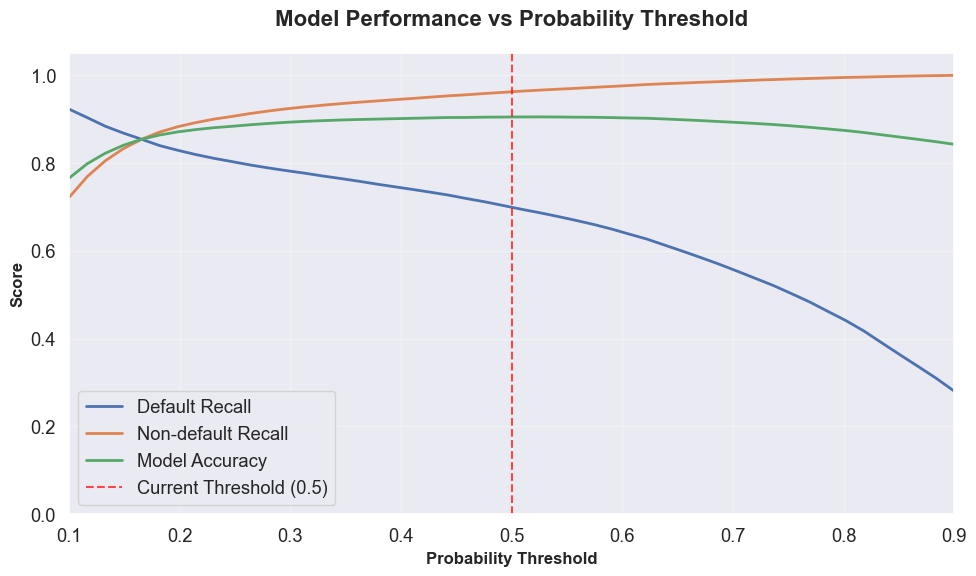


--- Metrics at Threshold = 0.5 ---
Default Recall: 0.6991
Non-default Recall: 0.9619
Accuracy: 0.9045


In [53]:
# Define a range of thresholds to test
thresholds = np.linspace(0.1, 0.9, 50)

# Initialize lists to store metrics
default_recalls = []
non_default_recalls = []
accuracies = []

# Calculate metrics for each threshold
for threshold in thresholds:
    # Create predictions based on current threshold using prob_default
    y_pred_threshold = (gbt_preds_df['prob_default'] >= threshold).astype(int)
    
    # Calculate recall for each class
    default_recall = recall_score(y_test, y_pred_threshold, pos_label=1)
    non_default_recall = recall_score(y_test, y_pred_threshold, pos_label=0)
    accuracy = accuracy_score(y_test, y_pred_threshold)
    
    # Store metrics
    default_recalls.append(default_recall)
    non_default_recalls.append(non_default_recall)
    accuracies.append(accuracy)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, default_recalls, label='Default Recall', linewidth=2)
plt.plot(thresholds, non_default_recalls, label='Non-default Recall', linewidth=2)
plt.plot(thresholds, accuracies, label='Model Accuracy', linewidth=2)

# Add vertical line at threshold = 0.5
plt.axvline(x=0.5, color='red', linestyle='--', linewidth=1.5, alpha=0.7, label='Current Threshold (0.5)')

plt.xlabel('Probability Threshold', fontsize=12, fontweight='bold')
plt.ylabel('Score', fontsize=12, fontweight='bold')
plt.title('Model Performance vs Probability Threshold', fontsize=16, fontweight='bold', loc='center', pad=20)
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.xlim(0.1, 0.9)
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()

# Print metrics at threshold = 0.5 for reference
print("\n--- Metrics at Threshold = 0.5 ---")
y_pred_05 = (gbt_preds_df['prob_default'] >= 0.5).astype(int)
print(f"Default Recall: {recall_score(y_test, y_pred_05, pos_label=1):.4f}")
print(f"Non-default Recall: {recall_score(y_test, y_pred_05, pos_label=0):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_05):.4f}")

## ROC curve

0.904506274697121


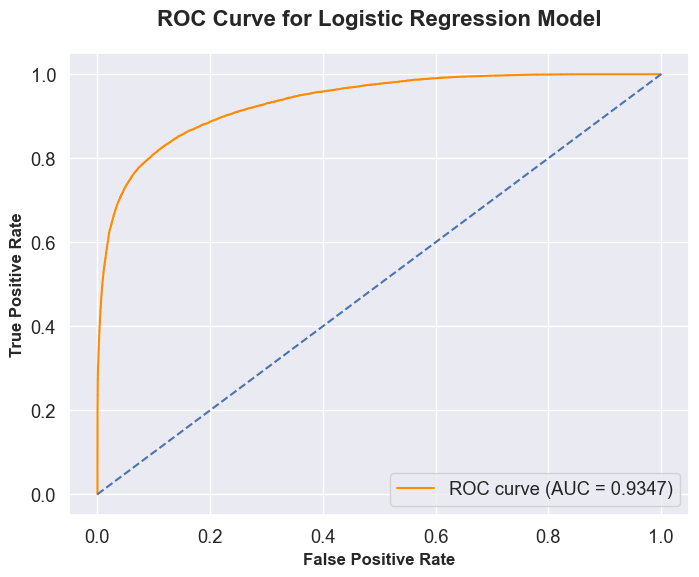

In [54]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score

# Create predictions using the SCALED test data and store them in a variable
gbt_preds = clf_gbt.predict_proba(X_test_scaled)

# Print the accuracy score the model
print(clf_gbt.score(X_test_scaled, y_test))

# Plot the ROC curve of the probabilities of default
prob_default = gbt_preds[:, 1]
# Compute the AUC and store it in a variable
roc_auc = roc_auc_score(y_test, prob_default)
fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)
plt.figure(figsize=(8, 6))
plt.plot(fallout, sensitivity, color = 'darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve for Logistic Regression Model', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.legend(loc='lower right')
plt.show()

# Comparision

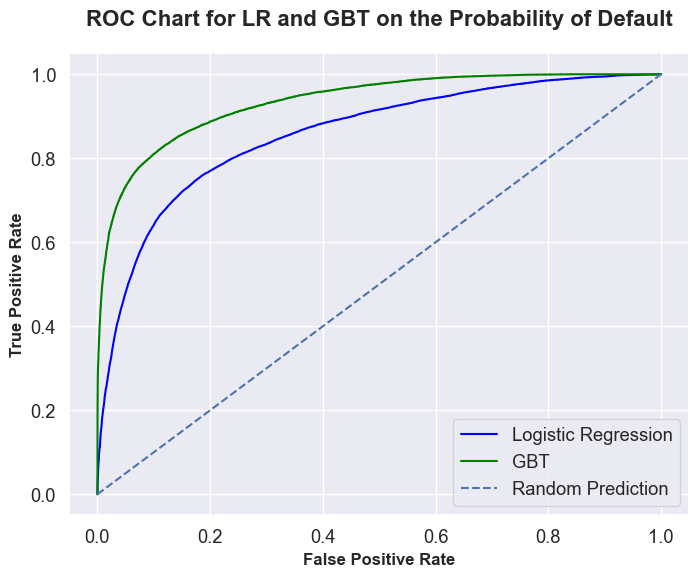

In [55]:
# ROC chart components
fallout_lr, sensitivity_lr, thresholds_lr = roc_curve(y_test, preds[:, 1])
fallout_gbt, sensitivity_gbt, thresholds_gbt = roc_curve(y_test, gbt_preds[:, 1])

# ROC Chart with both
plt.figure(figsize=(8, 6))
plt.plot(fallout_lr, sensitivity_lr, color = 'blue', label='%s' % 'Logistic Regression')
plt.plot(fallout_gbt, sensitivity_gbt, color = 'green', label='%s' % 'GBT')
plt.plot([0, 1], [0, 1], linestyle='--', label='%s' % 'Random Prediction')
plt.title("ROC Chart for LR and GBT on the Probability of Default", fontsize=16, fontweight='bold', pad=20)
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.legend()
plt.show()

In [56]:
# Print the logistic regression AUC with formatting
print("Logistic Regression AUC Score: %0.2f" % roc_auc_score(y_test, preds[:, 1]))

# Print the gradient boosted tree AUC with formatting
print("Gradient Boosted Tree AUC Score: %0.2f" % roc_auc_score(y_test, gbt_preds[:, 1]))

Logistic Regression AUC Score: 0.86
Gradient Boosted Tree AUC Score: 0.93


y_test length: 184232
preds length: 184232
gbt_preds length: 184232
--- Calibration Data Generated ---

--- Logistic Regression (LR) ---
Fraction of Positives (frac_of_pos_lr - True Y values in each bin):
[0.05102155 0.132606   0.23327113 0.36000402 0.49584877 0.57817834
 0.68425926 0.7260122  0.81129783 0.90633609]

Mean Predicted Value (mean_pred_val_lr - Average predicted P in each bin):
[0.05021047 0.14172476 0.24545197 0.34710867 0.44895009 0.55004064
 0.64897458 0.74856357 0.84881302 0.94968399]

--- Gradient Boosting Tree (GBT) ---
Fraction of Positives (frac_of_pos_gbt - True Y values in each bin):
[0.02922988 0.14058756 0.24446745 0.32972615 0.42614723 0.54086426
 0.68654311 0.79695431 0.90108086 0.99199789]

Mean Predicted Value (mean_pred_val_gbt - Average predicted P in each bin):
[0.03822643 0.13791741 0.24463419 0.34827232 0.45092863 0.55138057
 0.65099642 0.75126601 0.85070091 0.96475681]


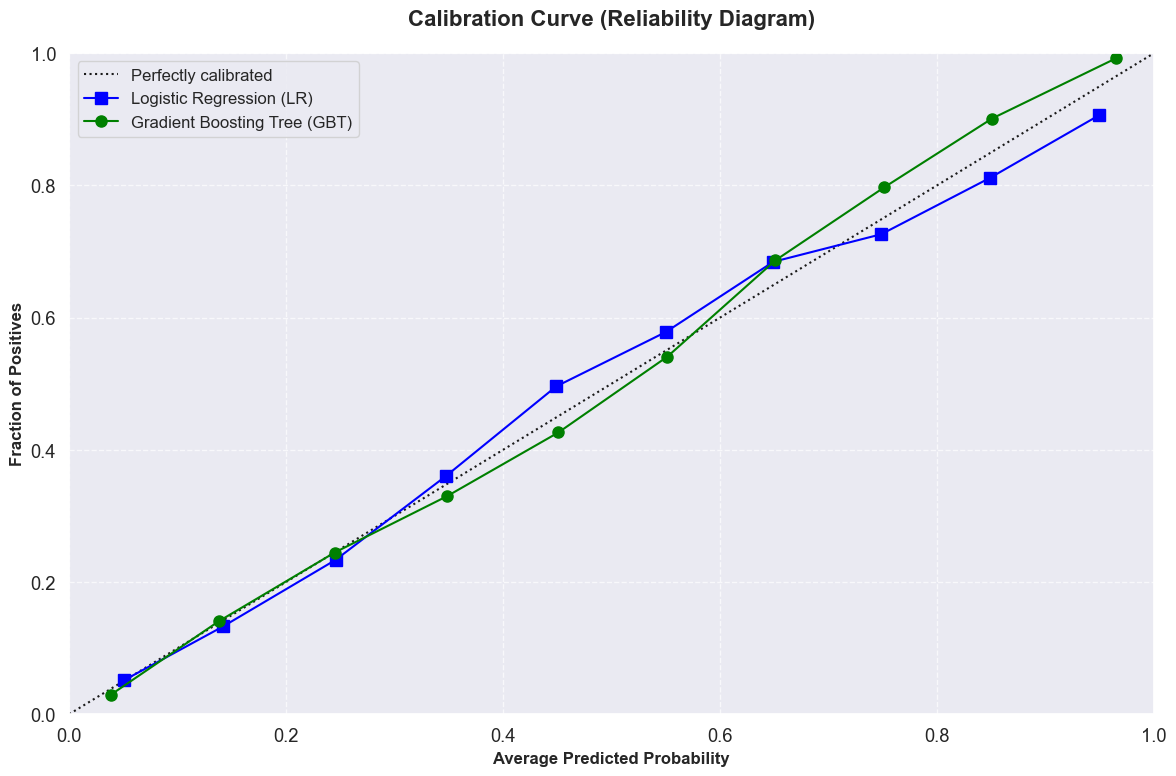

In [57]:
from sklearn.calibration import calibration_curve

# 1. GENERATE CALIBRATION DATA FOR LOGISTIC REGRESSION (LR)

# Generate Predicted Probabilities for the Positive Class (Class 1)
# Create predictions of probability for loan status using test data
preds = clf_logistic_multi.predict_proba(X_test_scaled)[:, 1]

# Generate Calibration Data using the true labels and predicted probabilities
frac_of_pos_lr, mean_pred_val_lr = calibration_curve(y_test, preds, n_bins=10)

# 2. GENERATE CALIBRATION DATA FOR GRADIENT BOOSTING TREE (GBT)
gbt_preds = clf_gbt.predict_proba(X_test_scaled)[:, 1]

# Generate Calibration Data using the true labels and predicted probabilities
frac_of_pos_gbt, mean_pred_val_gbt = calibration_curve(y_test, gbt_preds, n_bins=10)

# Check lengths to ensure matching
print(f"y_test length: {len(y_test)}")
print(f"preds length: {len(preds)}")
print(f"gbt_preds length: {len(gbt_preds)}")  

# Optional: Print the first few values to verify
print("--- Calibration Data Generated ---")

print("\n--- Logistic Regression (LR) ---")
print("Fraction of Positives (frac_of_pos_lr - True Y values in each bin):")
print(frac_of_pos_lr)
print("\nMean Predicted Value (mean_pred_val_lr - Average predicted P in each bin):")
print(mean_pred_val_lr)

print("\n--- Gradient Boosting Tree (GBT) ---")
print("Fraction of Positives (frac_of_pos_gbt - True Y values in each bin):")
print(frac_of_pos_gbt)
print("\nMean Predicted Value (mean_pred_val_gbt - Average predicted P in each bin):")
print(mean_pred_val_gbt)


# Add the calibration curve for the gradient boosted tree
plt.figure(figsize=(12, 8))
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')
## Logistic Regression
plt.plot(mean_pred_val_lr, frac_of_pos_lr, "s-", markersize=8, label="Logistic Regression (LR)", color="blue")

## Gradient Boosting
plt.plot(mean_pred_val_gbt, frac_of_pos_gbt, "o-", markersize=8, label="Gradient Boosting Tree (GBT)", color="green")

## Styling
plt.title("Calibration Curve (Reliability Diagram)", fontsize=16, fontweight='bold', loc='center', pad=20)
plt.xlabel('Average Predicted Probability', fontsize=12, fontweight='bold')
plt.ylabel("Fraction of Positives", fontsize=12, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


In [58]:
# Check the statistics of the probabilities of default
print(gbt_preds_df['prob_default'].describe())

# Calculate the threshold for a 85% acceptance rate
threshold_85 = np.quantile(gbt_preds_df['prob_default'], 0.85)

# Apply acceptance rate threshold
gbt_preds_df['pred_loan_status'] = gbt_preds_df['prob_default'].apply(lambda x: 1 if x > threshold_85 else 0)

# Print the counts of loan status after the threshold
print(gbt_preds_df['pred_loan_status'].value_counts())
plt.show()

count    184232.000000
mean          0.218463
std           0.298302
min           0.000029
25%           0.027996
50%           0.075625
75%           0.244206
max           0.999996
Name: prob_default, dtype: float64
pred_loan_status
0    156598
1     27634
Name: count, dtype: int64


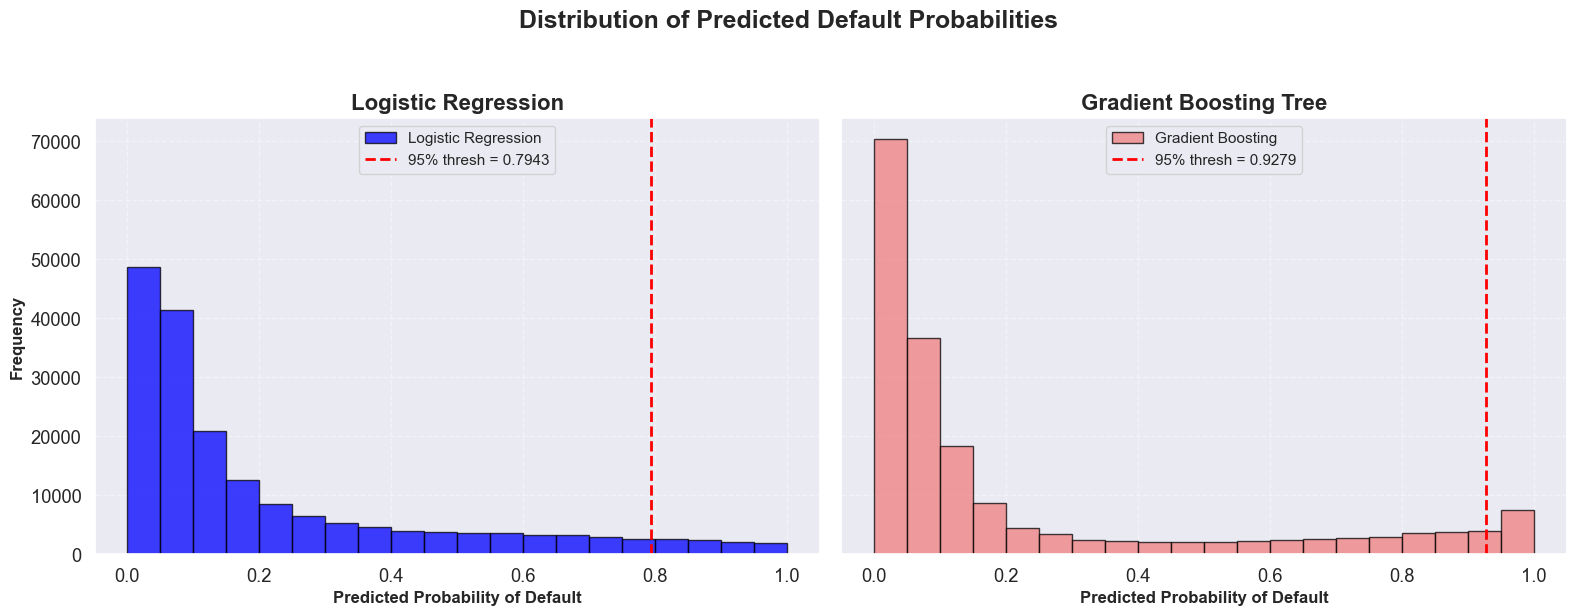

In [59]:
# Create side-by-side sub-plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Setting the threshold
thresh_lr  = np.quantile(preds_df['prob_default'], 0.95)
thresh_gbt = np.quantile(gbt_preds_df['prob_default'], 0.95)

# Logistic Regression (left)
ax1.hist(preds_df['prob_default'], bins=20,
         color='blue', edgecolor='black', alpha=0.75, label='Logistic Regression')
ax1.axvline(thresh_lr, color='red', linestyle='--', linewidth=2, label=f'95% thresh = {thresh_lr:.4f}')
ax1.set_title('Logistic Regression', fontsize=16, fontweight='bold')
ax1.set_xlabel('Predicted Probability of Default', fontsize=12, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax1.legend(fontsize=11, loc='upper center')
ax1.grid(True, linestyle='--', alpha=0.4)

# Gradient Boosting Trees (right)
ax2.hist(gbt_preds_df['prob_default'], bins=20,
         color='lightcoral', edgecolor='black', alpha=0.75, label='Gradient Boosting')
ax2.axvline(thresh_gbt, color='red', linestyle='--', linewidth=2, label=f'95% thresh = {thresh_gbt:.4f}')
ax2.set_title('Gradient Boosting Tree', fontsize=16, fontweight='bold')
ax2.set_xlabel('Predicted Probability of Default', fontsize=12, fontweight='bold')
ax2.legend(fontsize=11, loc='upper center')
ax2.grid(True, linestyle='--', alpha=0.4)

# Global figure title
fig.suptitle('Distribution of Predicted Default Probabilities', fontsize=18, fontweight='bold', y=1.03)
plt.tight_layout()
plt.show()